# IMPORT ALL REQUIRED DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import math
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# Import Data

In [ ]:
training_url = 'https://raw.githubusercontent.com/RR979/Assignment1a_dt/main/assignment1_data_main/census_income_data.csv'
test_url = 'https://raw.githubusercontent.com/RR979/Assignment1a_dt/main/assignment1_data_main/census_income_test.csv'
training = pd.read_csv(training_url,skipinitialspace = True)
test = pd.read_csv(test_url,skipinitialspace = True)

# Data Preprocessing


In [ ]:
training.rename(columns={"class": "income"}, inplace=True)
training['income'] = training['income'].map({'>50K': 'high', '<=50K': 'low'})
test.rename(columns={"class": "income"}, inplace=True)
test['income'] = test['income'].map({'>50K.': 'high', '<=50K.': 'low'})

Both training and testing data have missing values in the columns native_country, workclass and occupation respectively.

Missing values are in the form of "?"

In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)
#Below List Sorted by age

,native_country,income,age,hours_per_week
35,Hungary,high,57.333333,50.000000
8,Columbia,high,53.500000,50.000000
66,Scotland,high,52.666667,46.666667
60,Poland,high,50.583333,39.000000
43,Italy,high,50.360000,45.400000
24,Greece,high,50.250000,50.625000
16,El-Salvador,high,50.111111,45.000000
28,Haiti,high,48.000000,42.750000
14,Ecuador,high,47.500000,48.750000
11,Cuba,low,47.285714,37.985714


In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,native_country,income,age,hours_per_week
31,Honduras,high,47.000000,60.000000
72,Thailand,high,32.666667,58.333333
68,South,high,44.875000,51.437500
20,France,high,40.166667,50.750000
24,Greece,high,50.250000,50.625000
35,Hungary,high,57.333333,50.000000
8,Columbia,high,53.500000,50.000000
80,Yugoslavia,high,40.166667,49.500000
14,Ecuador,high,47.500000,48.750000
41,Ireland,high,43.600000,48.000000


Conclusions

* The Age range of ? high income individuals ranges between Italy low income and USA high income.
* The Age range of ? low income individuals ranges between South low income and Germany low income
* The work hour range of ? high income individuals ranges between Canada high income and USA high income
* The work hour range of ? low income individuals ranges between South low income and Laos low income


In [ ]:
#Doing the same for the Testing data
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)
#Below List Sorted by age

,native_country,income,age,hours_per_week
64,Scotland,low,55.222222,42.222222
33,Hungary,high,54.000000,42.666667
76,Yugoslavia,high,53.000000,25.000000
69,Thailand,high,53.000000,45.000000
20,France,high,52.000000,33.750000
43,Jamaica,high,51.600000,45.000000
34,Hungary,low,51.000000,43.333333
54,Peru,high,49.500000,40.000000
52,Outlying-US(Guam-USVI-etc),high,49.000000,40.000000
25,Greece,low,48.000000,42.000000


In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,native_country,income,age,hours_per_week
8,Columbia,high,47.000000,62.500000
24,Greece,high,42.600000,59.500000
2,Cambodia,high,30.500000,57.500000
65,South,high,37.750000,51.250000
37,Iran,high,31.000000,50.000000
18,England,high,43.352941,49.411765
60,Portugal,high,39.375000,49.375000
22,Germany,high,47.785714,48.000000
4,Canada,high,47.083333,46.916667
41,Italy,high,46.777778,46.333333


In [ ]:
#Country wise data of high income category
test.loc[((test.income=="high")),"native_country"].value_counts()

United-States                 3523
?                               74
Philippines                     24
Canada                          24
India                           22
England                         17
China                           16
Germany                         14
Mexico                          14
Greece                          10
Italy                            9
Cuba                             9
Japan                            8
Puerto-Rico                      8
Portugal                         8
Ireland                          6
Taiwan                           6
Haiti                            5
Poland                           5
Jamaica                          5
South                            4
Iran                             4
France                           4
Hungary                          3
Dominican-Republic               3
Peru                             2
Hong                             2
Cambodia                         2
Ecuador             

In [ ]:
#Replacing ? low income with South and ? high income with USA

training.loc[((training.native_country=="?")&(training.income=="high")),"native_country"] = "United-States"
training.loc[((training.native_country=="?")&(training.income=="low")),"native_country"] = "South"


In [ ]:
#replaceing the ? high in test data with USA and ? low also  USA,iran and south randomly
test.loc[((test.native_country=="?")&(test.income=="high")),"native_country"] = "United-States"

random_values = ["United-States", "Iran", "South"]
test['native_country'] = np.where(test['native_country'] == "?", np.random.choice(random_values), test['native_country'])

Now using similar tactics to fill workclass and occupation columns.

In [ ]:
training.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,workclass,income,age,hours_per_week
9,Self-emp-inc,high,48.249196,50.154341
10,Self-emp-inc,low,43.206478,47.135628
11,Self-emp-not-inc,high,46.428177,46.691989
7,Private,high,42.815233,45.500907
13,State-gov,high,45.209632,44.186969
4,Local-gov,high,44.254457,43.956240
12,Self-emp-not-inc,low,44.388553,43.517336
2,Federal-gov,high,45.711590,43.420485
3,Federal-gov,low,40.624788,40.093379
5,Local-gov,low,40.704607,39.739837


In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by age

,workclass,income,age,hours_per_week
0,?,high,55.617801,36.146597
9,Self-emp-inc,high,48.249196,50.154341
15,Without-pay,low,47.785714,32.714286
11,Self-emp-not-inc,high,46.428177,46.691989
2,Federal-gov,high,45.711590,43.420485
13,State-gov,high,45.209632,44.186969
12,Self-emp-not-inc,low,44.388553,43.517336
4,Local-gov,high,44.254457,43.956240
10,Self-emp-inc,low,43.206478,47.135628
7,Private,high,42.815233,45.500907


We draw the conclusions

* The workclass ? with high income lie in age range of self-employed
* The workclass ? with low income lie in age range of state-gov low and fed-gov low
* The workclass ? with high income lie in work hour range of without pay with low inc and state gov with low inc
* The workclass ? with low income lie in work hour range of without pay low and self employed low


As we cannot conclude much, we just fill the missing values using the mode


In [ ]:
#Replace the ? with nan first
training["workclass"] = training["workclass"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_missing_values(group):
  mode_workclass = group["workclass"].value_counts().index[0]
  group["workclass"].fillna(mode_workclass,inplace=True)
  return group

#Updating
training = training.groupby(["native_country","income"]).apply(fill_missing_values)

<ipython-input-79-f84c7bc2f445>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  training = training.groupby(["native_country","income"]).apply(fill_missing_values)


In [ ]:
#Replace the ? with nan first
training["occupation"]=training["occupation"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_occupation_values(group):
  mode_occupation = group["occupation"].value_counts().index[0]
  group["occupation"].fillna(mode_occupation,inplace=True)
  return group
#Updating
training = training.groupby(["native_country","income"]).apply(fill_occupation_values)

<ipython-input-80-445d8d1563d5>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  training = training.groupby(["native_country","income"]).apply(fill_occupation_values)


In [ ]:
test.workclass.describe()

count       16281
unique          9
top       Private
freq        11210
Name: workclass, dtype: object

In [ ]:
test.workclass.value_counts()

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

In [ ]:
#Doing the same for testing data
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,workclass,income,age,hours_per_week
9,Self-emp-inc,high,47.028481,50.411392
15,Without-pay,high,57.000000,50.000000
11,Self-emp-not-inc,high,47.252125,47.739377
10,Self-emp-inc,low,43.399240,45.307985
7,Private,high,42.977310,45.163366
4,Local-gov,high,44.380645,44.564516
2,Federal-gov,high,45.721053,43.768421
13,State-gov,high,45.683616,43.700565
12,Self-emp-not-inc,low,45.584711,43.105372
3,Federal-gov,low,40.414894,40.450355


In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by age

,workclass,income,age,hours_per_week
15,Without-pay,high,57.000000,50.000000
0,?,high,55.648649,32.837838
11,Self-emp-not-inc,high,47.252125,47.739377
9,Self-emp-inc,high,47.028481,50.411392
2,Federal-gov,high,45.721053,43.768421
13,State-gov,high,45.683616,43.700565
12,Self-emp-not-inc,low,45.584711,43.105372
4,Local-gov,high,44.380645,44.564516
10,Self-emp-inc,low,43.399240,45.307985
7,Private,high,42.977310,45.163366


So replacing missing values with mode of the data

In [ ]:
#Replace the ? with nan first
test["workclass"] = test["workclass"].replace("?",np.nan)

#Function to fill missing values in workclass column with most frequent value
def fill_missing_values(group):
  mode_workclass = group["workclass"].value_counts().index[0]
  group["workclass"].fillna(mode_workclass,inplace=True)
  return group

#Updating
test = test.groupby(["native_country","income"]).apply(fill_missing_values)

<ipython-input-85-82a31994381f>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = test.groupby(["native_country","income"]).apply(fill_missing_values)


In [ ]:
#Same for Occupation column
#Replace the ? with nan first
test["occupation"]=test["occupation"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_occupation_values(group):
  mode_occupation = group["occupation"].value_counts().index[0]
  group["occupation"].fillna(mode_occupation,inplace=True)
  return group
#Updating
test = test.groupby(["native_country","income"]).apply(fill_occupation_values)

<ipython-input-86-78e261c0cd71>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = test.groupby(["native_country","income"]).apply(fill_occupation_values)


In [ ]:
test.to_csv("testing_file.csv",index=False)
training.to_csv("training_file.csv",index=False)

Encoding the data

In [ ]:
train_encoded = pd.read_csv("training_file.csv")
test_encoded = pd.read_csv("testing_file.csv")

In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
train_categorical = train_encoded.select_dtypes(include=['object'])
train_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,low
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,low
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,low
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,low
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,low


In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
test_categorical = test_encoded.select_dtypes(include=['object'])
test_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,low
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,low
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,high
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,high
4,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States,low


In [ ]:
# apply label encoder to train_categorical
le = preprocessing.LabelEncoder()
train_categorical = train_categorical.apply(le.fit_transform)
train_categorical["income"] = 1 - le.transform(train_categorical["income"])
train_categorical.head(25)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,9,5,2,0,4,0
5,3,12,2,3,5,4,0,38,0
6,3,6,3,7,1,2,0,22,0
7,5,11,2,3,0,4,1,38,1
8,3,12,4,9,1,4,0,38,1
9,3,9,2,3,0,4,1,38,1


In [ ]:
# apply label encoder to df_categorical
lem = preprocessing.LabelEncoder()
test_categorical = test_categorical.apply(lem.fit_transform)
test_categorical["income"] = 1 - le.transform(test_categorical["income"])
test_categorical.head(25)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,3,1,4,6,3,2,1,37,0
1,3,11,2,4,0,4,1,37,0
2,1,7,2,10,0,4,1,37,1
3,3,15,2,6,0,2,1,37,1
4,3,15,4,0,3,4,0,37,0
5,3,0,4,7,1,4,1,37,0
6,3,11,4,0,4,2,1,37,0
7,5,14,2,9,0,4,1,37,1
8,3,15,4,7,4,4,0,37,0
9,3,5,2,2,0,4,1,37,0


In [ ]:
#Concatenate train_categorical dataframe with original train_encoded (dataframe)

# first, Drop earlier duplicate columns which had categorical values
train_encoded = train_encoded.drop(train_categorical.columns,axis=1)
train_encoded = pd.concat([train_encoded,train_categorical],axis=1)
train_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


In [ ]:
#Concatenate test_categorical dataframe with original test_encoded (dataframe)

# first, Drop earlier duplicate columns which had categorical values
test_encoded = test_encoded.drop(test_categorical.columns,axis=1)
test_encoded = pd.concat([test_encoded,test_categorical],axis=1)
test_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,25,226802,7,0,0,40,3,1,4,6,3,2,1,37,0
1,38,89814,9,0,0,50,3,11,2,4,0,4,1,37,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,160323,10,7688,0,40,3,15,2,6,0,2,1,37,1
4,18,103497,10,0,0,30,3,15,4,0,3,4,0,37,0


Finally our data is ready for use. Just saving it in a file, just in case

In [ ]:
train_encoded.to_csv("training_encoded.csv")
test_encoded.to_csv("testing_encoded.csv")

In [ ]:
# convert target variable income to categorical
train_encoded['income'] = train_encoded['income'].astype('category')
test_encoded['income'] = test_encoded['income'].astype('category')

In [ ]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   fnlwgt          32561 non-null  int64   
 2   education_num   32561 non-null  int64   
 3   capital_gain    32561 non-null  int64   
 4   capital_loss    32561 non-null  int64   
 5   hours_per_week  32561 non-null  int64   
 6   workclass       32561 non-null  int64   
 7   education       32561 non-null  int64   
 8   marital_status  32561 non-null  int64   
 9   occupation      32561 non-null  int64   
 10  relationship    32561 non-null  int64   
 11  race            32561 non-null  int64   
 12  sex             32561 non-null  int64   
 13  native_country  32561 non-null  int64   
 14  income          32561 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


In [ ]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  int64   
 1   fnlwgt          16281 non-null  int64   
 2   education_num   16281 non-null  int64   
 3   capital_gain    16281 non-null  int64   
 4   capital_loss    16281 non-null  int64   
 5   hours_per_week  16281 non-null  int64   
 6   workclass       16281 non-null  int64   
 7   education       16281 non-null  int64   
 8   marital_status  16281 non-null  int64   
 9   occupation      16281 non-null  int64   
 10  relationship    16281 non-null  int64   
 11  race            16281 non-null  int64   
 12  sex             16281 non-null  int64   
 13  native_country  16281 non-null  int64   
 14  income          16281 non-null  category
dtypes: category(1), int64(14)
memory usage: 1.8 MB


Lets split the traing dataset we have into traing and testing for accuracy

In [ ]:
#Splitting the traing data

#Independent Variables/Feature
x = train_encoded.drop('income',axis=1)

#Response/Dependant variables
y = train_encoded['income']

In [ ]:
#Split data into training and testing for accuracy

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=99)

# Naive Bayes Classifier



In [ ]:
#For the naive baye's classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Create a Gaussian Classifier
model = GaussianNB()

nb_classifier = model.fit(x_train,y_train)


In [ ]:
predictions = nb_classifier.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9880
           1       0.65      0.31      0.42      3145

    accuracy                           0.79     13025
   macro avg       0.73      0.63      0.64     13025
weighted avg       0.77      0.79      0.76     13025



### We observe that the performance parameters are not upto the mark, so we have to incorporate some more pre-processiong technbiques to improve the performance

 We will incorporate

*   **Feature Engineering**:

  Explore the features in the dataset and consider creating new features that might be more informative for income prediction. For example, you can create a feature that represents the total number of education years by combining the 'education' and 'education-num' features.



In [ ]:
train_encoded_copy = train_encoded.copy()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Feature Engineering
train_encoded_copy['education_years'] = train_encoded_copy['education'] + train_encoded_copy['education_num']

# Split the data into features and target variable
x_new = train_encoded_copy.drop('income', axis=1)
y_new = train_encoded_copy['income']

# Feature Scaling
scaler = MinMaxScaler()
x_new = scaler.fit_transform(x_new)

# Split the data into training and testing sets
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.2, random_state=42)


In [ ]:
#For the naive baye's classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Create a Gaussian Classifier
model = GaussianNB()

nb_classifier = model.fit(x_train_new,y_train_new)

In [ ]:
predictions = nb_classifier.predict(x_test_new)
print(classification_report(y_test_new,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4942
           1       0.71      0.41      0.52      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.70      6513
weighted avg       0.80      0.82      0.80      6513



In [ ]:
nb_classifier.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

## Naive Bayes with HyperParameter tuning



*   Variable Smoothing:

    Variable smoothing, also known as Laplace smoothing or additive smoothing, is a technique used to handle zero probabilities or frequencies in probabilistic models. It is applied when calculating the conditional probabilities in the Naive Bayes classifier, specifically for continuous features.

*   If a feature value is absent in the training data for a     particular class, the frequency would be zero, resulting in a probability of zero. This can lead to issues during classification, especially if there are unseen feature values in the test data.

  To address this problem, variable smoothing adds a small constant value (usually 1) to the frequencies of each feature value for each class. This ensures that no probability becomes zero and prevents issues related to unseen feature values during classification.



In [ ]:
#For the naive baye's classifier with hyperparamter tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

#Create a Gaussian Classifier
model = GaussianNB()
# Define the parameter grid for GridSearchCV
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_new, y_train_new)


nb_classifier = model.fit(x_train_new,y_train_new)

In [ ]:
# Get the best model from GridSearchCV
nb_best_model = grid_search.best_estimator_

# Make predictions on the test set
nb_predictions = nb_best_model.predict(x_test_new)

# Evaluate performance
print(classification_report(y_test_new, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4942
           1       0.71      0.41      0.52      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.70      6513
weighted avg       0.80      0.82      0.80      6513



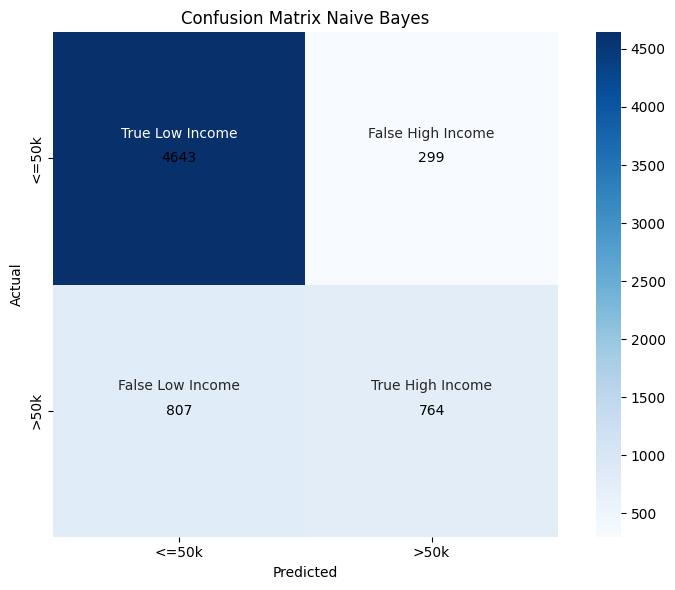

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_test_new, nb_predictions)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()


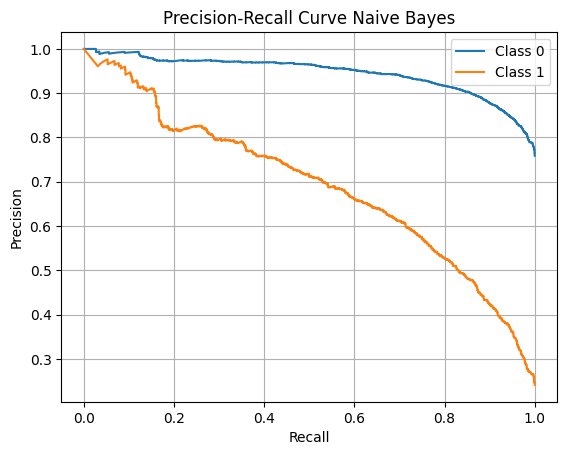

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (>= 50K)
nb_probas_pr_0 = nb_best_model.predict_proba(x_test_new)[:, 0]
nb_probas_pr_1 = nb_best_model.predict_proba(x_test_new)[:, 1]

# Compute precision and recall
precision_0, recal_0, _ = precision_recall_curve(y_test_new, nb_probas_pr_0,pos_label=0)
precision_1, recal_1, _ = precision_recall_curve(y_test_new, nb_probas_pr_1,pos_label=1)

# Plot precision-recall curve
plt.plot(recal_0, precision_0,label="Class 0")
plt.plot(recal_1, precision_1,label="Class 1")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve Naive Bayes')
plt.grid(True)
plt.show()




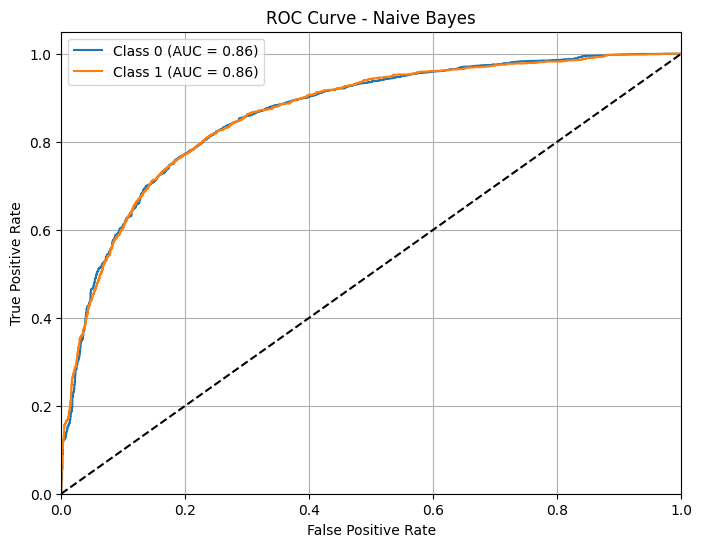

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = nb_best_model.predict_proba(x_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(nb_best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_new, probas[:, i], pos_label=nb_best_model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(nb_best_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {nb_best_model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

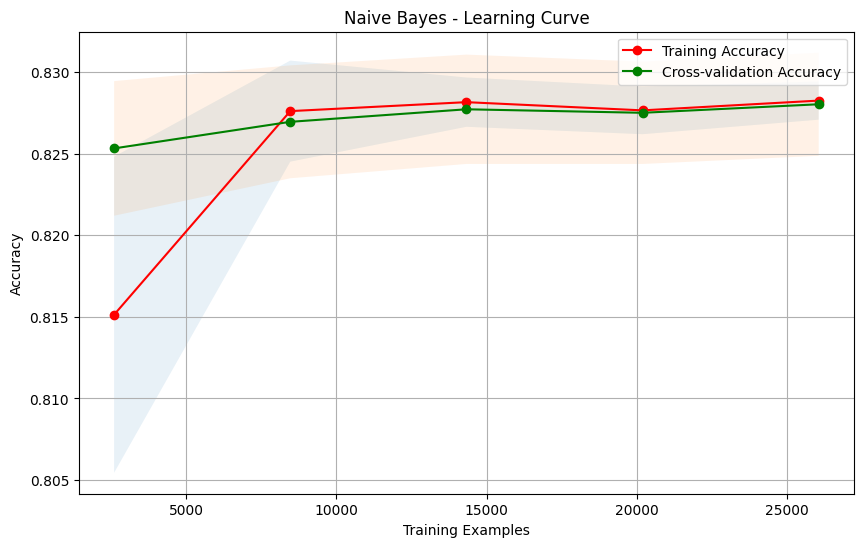

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(nb_best_model, x_new, y_new, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Naive Bayes - Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.legend(loc='best')
plt.show()

# Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Train the model
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train_new,y_train_new)

#Predict
logreg_predictions = logreg.predict(x_test_new)
print(classification_report(y_test_new,logreg_predictions))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.71      0.45      0.55      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



In [ ]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

### Hyperparameter Tuning in Logistic Regression

To improve the performance of the model, we employ some hyper para meter tuning techniques :

*   **Tweaking the Regularization Parameter** :     
    Logistic regression models can be prone to overfitting, especially when dealing with high-dimensional data or when there is a large number of input features. Overfitting occurs when the model fits the training data too closely, capturing noise or irrelevant patterns, which can lead to poor generalization on unseen data.

    The regularization parameter, often denoted as C in logistic regression, helps to mitigate overfitting by adding a penalty term to the objective function that the model optimizes. This penalty term discourages the model from assigning excessive importance to any particular feature or from overfitting the data.

    The regularization parameter C controls the trade-off between fitting the training data well (minimizing the training loss) and keeping the model's coefficients (weights) small. A higher C value allows the model to fit the training data more closely, potentially capturing more complex patterns, but also increasing the risk of overfitting. Conversely, a lower C value imposes stronger regularization, which encourages the model to have smaller coefficients and simpler decision boundaries.

*   **Tweaking the solver**  :    
    Different solvers use different mathematical optimization techniques to find the optimal weights for the logistic regression model.

    



In [ ]:
#Logistic Regression with Hyperparamter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=500)

# Define the hyperparameters to tune
param_grid = {'C': np.logspace(-1, 2, num=100),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train_new, y_train_new)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(x_train_new, y_train_new)

# Make predictions and evaluate performance
logreg_predictions = best_logreg.predict(x_test_new)
print(classification_report(y_test_new, logreg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



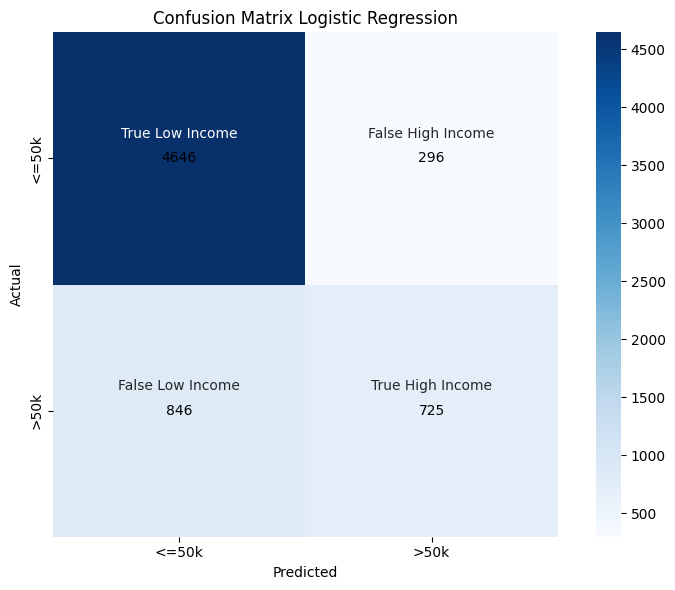

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_test_new, logreg_predictions)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()


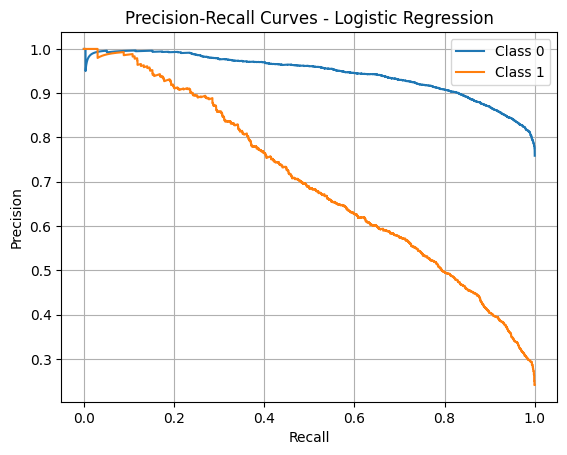

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = best_logreg.predict_proba(x_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

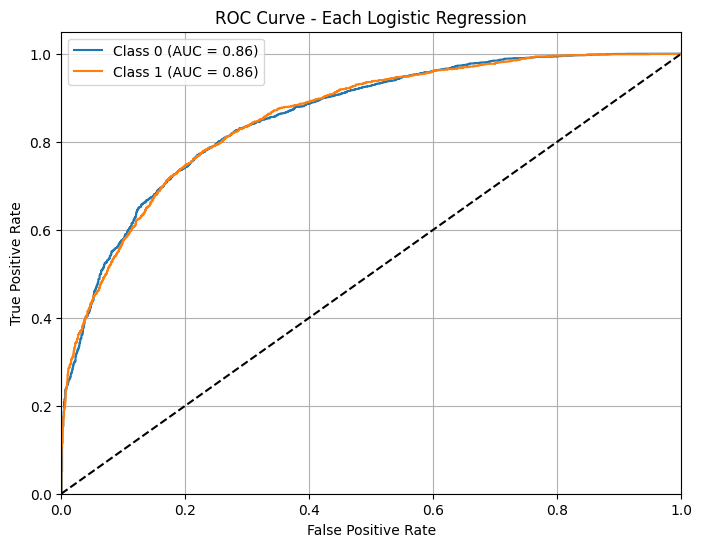

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = best_logreg.predict_proba(x_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(best_logreg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_new, probas[:, i], pos_label=best_logreg.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_logreg.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {best_logreg.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Each Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

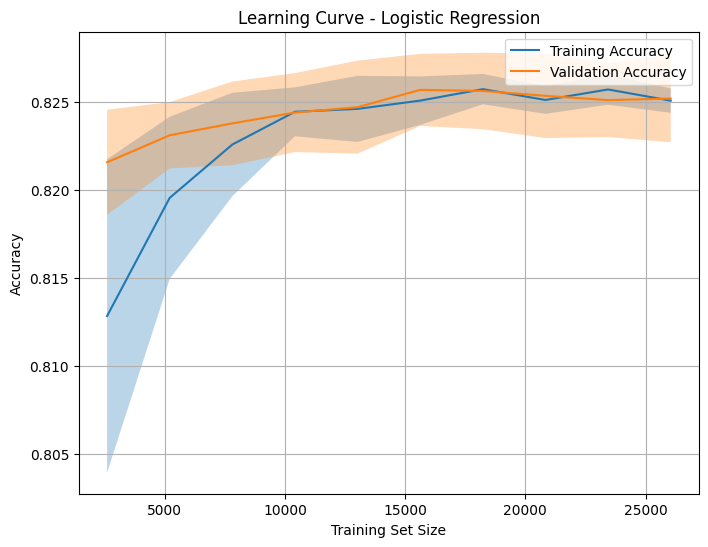

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_logreg, x_new, y_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Neural Network Classifier

### Using Sckit Learn MLP Classifier

The MLPClassifier, which stands for Multi-Layer Perceptron Classifier, is a class in the scikit-learn (sklearn) library that represents a type of artificial neural network called a multi-layer perceptron (MLP). MLPs are a class of feedforward neural networks, which are widely used for classification tasks.



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create a Neural Network classifier with 1 hidden layer
neural_classifier_1 = MLPClassifier(hidden_layer_sizes=(11), random_state=42,activation='logistic',max_iter=10000)

# Train the classifier
neural_classifier_1.fit(x_train_new, y_train_new)

# Make predictions on the test set
neural_predictions_1 = neural_classifier_1.predict(x_test_new)

# Evaluate performance
print(classification_report(y_test_new, neural_predictions_1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4942
           1       0.74      0.57      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



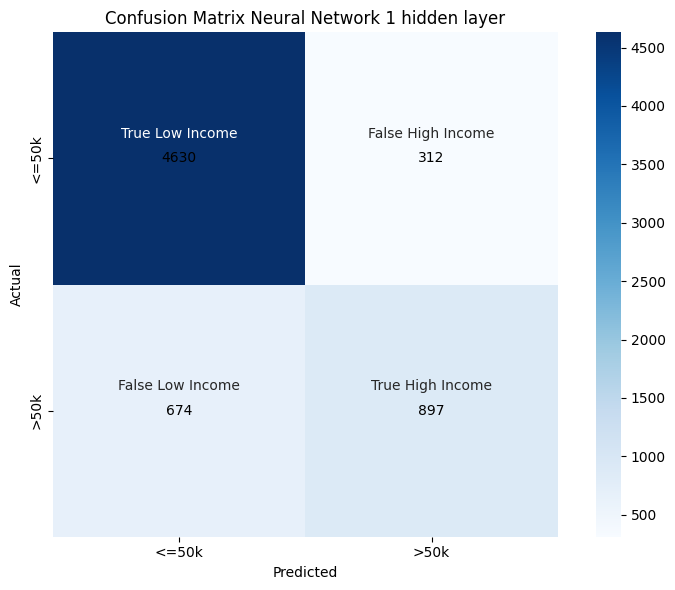

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_test_new, neural_predictions_1)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Neural Network 1 hidden layer")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

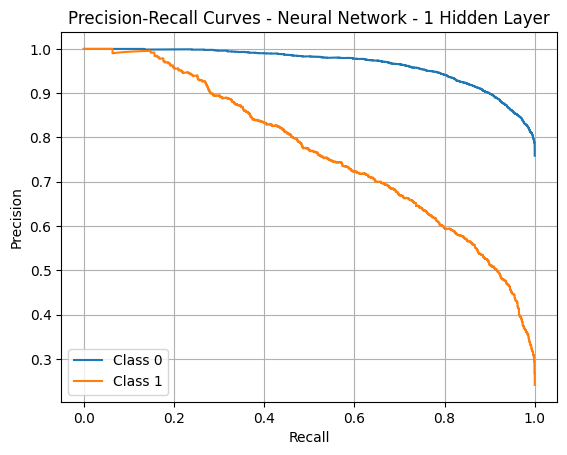

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = neural_classifier_1.predict_proba(x_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Neural Network - 1 Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

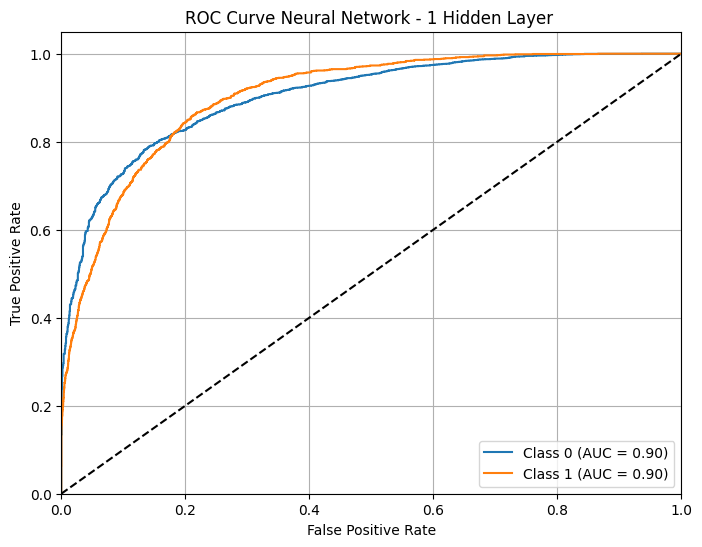

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = neural_classifier_1.predict_proba(x_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(neural_classifier_1.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_new, probas[:, i], pos_label=neural_classifier_1.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(neural_classifier_1.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {neural_classifier_1.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Neural Network - 1 Hidden Layer ')
plt.legend()
plt.grid(True)
plt.show()

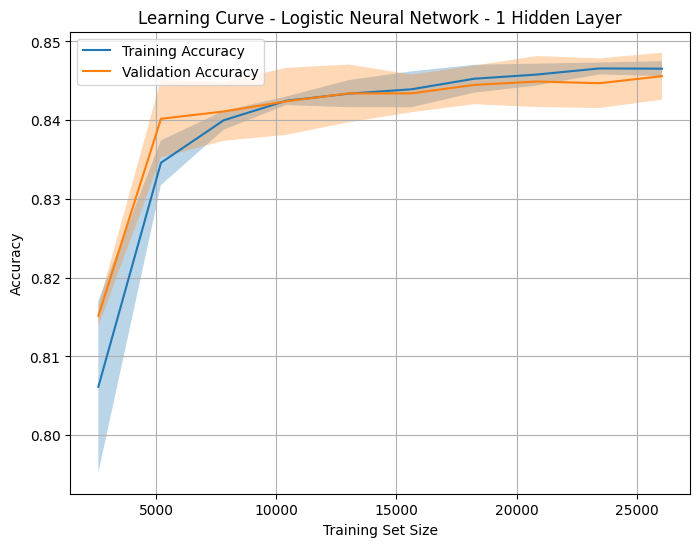

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    neural_classifier_1, x_new, y_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 1 Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a Neural Network classifier with 2 hidden layers
neural_classifier_2 = MLPClassifier(hidden_layer_sizes=(11, 9), random_state=42,activation='logistic',max_iter=1000)

# Train the classifier
neural_classifier_2.fit(x_train_new, y_train_new)

# Make predictions on the test set
neural_predictions_2 = neural_classifier_2.predict(x_test_new)

# Evaluate performance
print(classification_report(y_test_new, neural_predictions_2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4942
           1       0.73      0.58      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



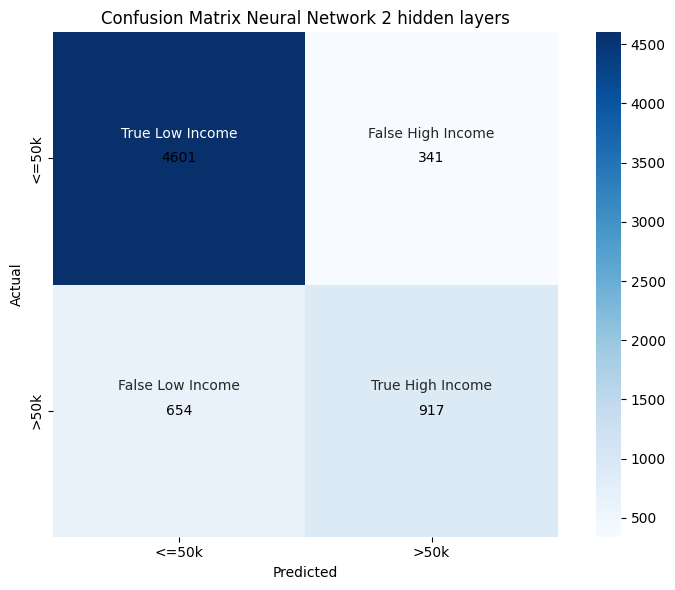

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_test_new, neural_predictions_2)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Neural Network 2 hidden layers")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

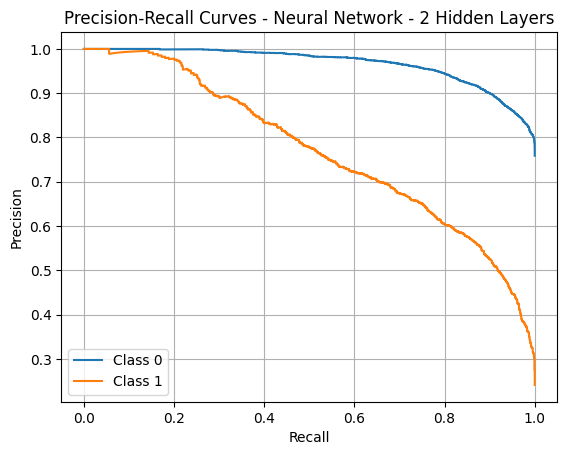

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = neural_classifier_2.predict_proba(x_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Neural Network - 2 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

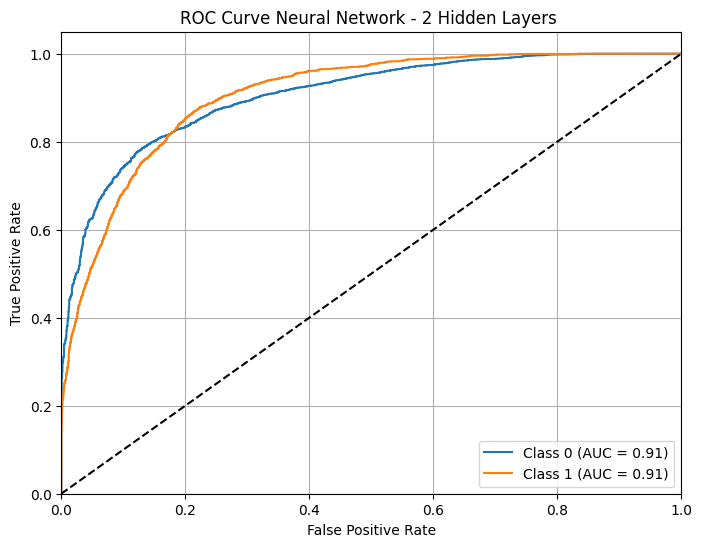

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = neural_classifier_2.predict_proba(x_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(neural_classifier_2.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_new, probas[:, i], pos_label=neural_classifier_2.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(neural_classifier_2.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {neural_classifier_2.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Neural Network - 2 Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()

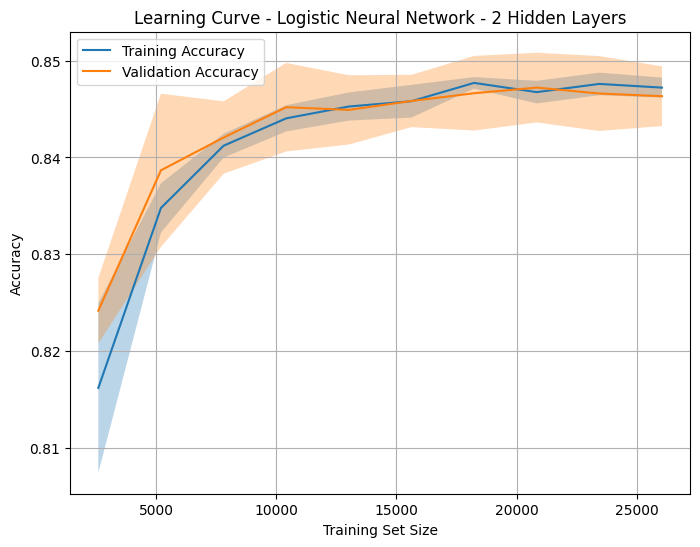

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    neural_classifier_2, x_new, y_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 2 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a Neural Network classifier with 2 hidden layers
neural_classifier_3 = MLPClassifier(hidden_layer_sizes=(11, 9,7), random_state=42,activation='logistic',max_iter=10000)

# Train the classifier
neural_classifier_3.fit(x_train_new, y_train_new)

# Make predictions on the test set
neural_predictions_3 = neural_classifier_3.predict(x_test_new)

# Evaluate performance
print(classification_report(y_test_new, neural_predictions_3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4942
           1       0.74      0.58      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



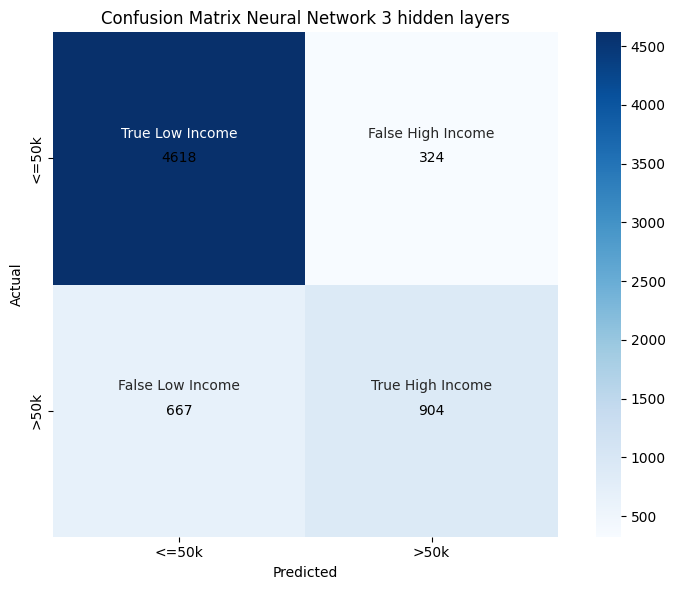

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_test_new, neural_predictions_3)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Neural Network 3 hidden layers")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

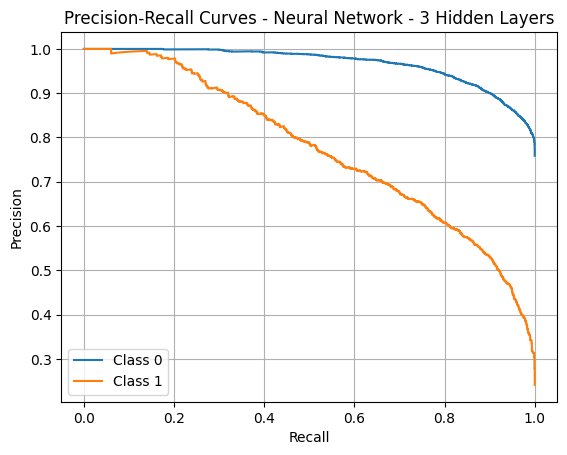

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = neural_classifier_3.predict_proba(x_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Neural Network - 3 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

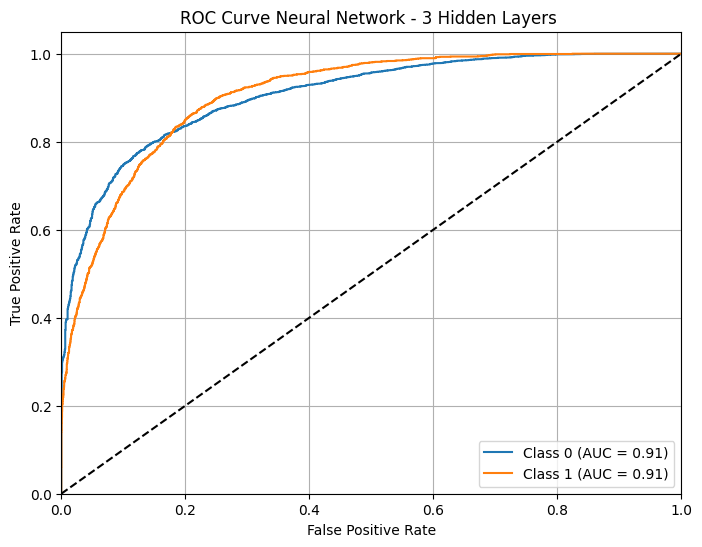

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = neural_classifier_3.predict_proba(x_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(neural_classifier_3.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_new, probas[:, i], pos_label=neural_classifier_3.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(neural_classifier_3.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {neural_classifier_3.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Neural Network - 3 Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()

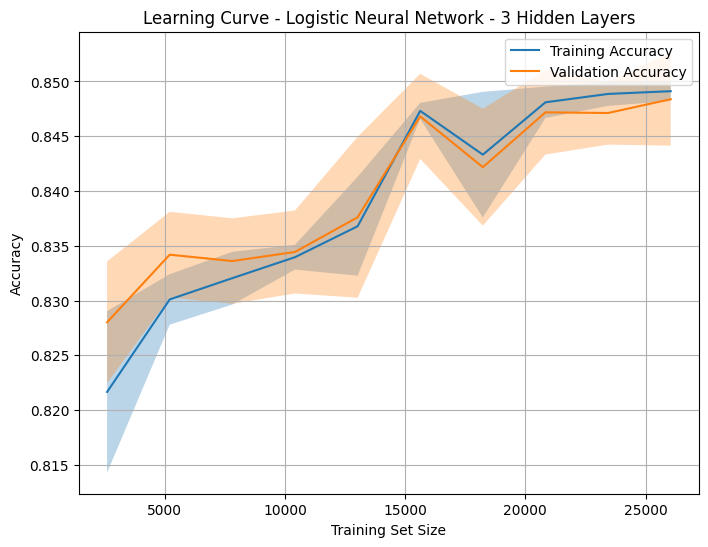

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    neural_classifier_3, x_new, y_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 3 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

# Combing the Training and Testing datasets, and putting up a comparitive study

In [ ]:
test_encoded_copy = test_encoded.copy()

In [ ]:
# Feature Engineering
test_encoded_copy['education_years'] = test_encoded_copy['education'] + test_encoded_copy['education_num']

In [ ]:
from sklearn.utils import shuffle
combined = pd.concat([train_encoded_copy, test_encoded_copy], ignore_index=True)

# Shuffle the combined dataframe
combined_encoded = shuffle(combined)

# Reset the index of the shuffled dataframe
combined_encoded.reset_index(drop=True, inplace=True)

combined_encoded.to_csv("combined_encoded.csv")

In [ ]:
# Split the data into features and target variable
x_combined_new = combined_encoded.drop('income', axis=1)
y_combined_new = combined_encoded['income']

# Feature Scaling
scaler = MinMaxScaler()
x_combined_new = scaler.fit_transform(x_combined_new)

# Split the data into training and testing sets
x_combined_train_new, x_combined_test_new, y_combined_train_new, y_combined_test_new = train_test_split(x_combined_new,y_combined_new, test_size=0.33, random_state=42)

### Naive Bayes Classifier

In [ ]:
#For the naive baye's classifier with hyperparamter tuning
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

#Create a Gaussian Classifier
model = GaussianNB()
# Define the parameter grid for GridSearchCV
param_grid = {'var_smoothing': np.logspace(0, -1, num=50)}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_combined_train_new, y_combined_train_new)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.        , 0.95409548, 0.91029818, 0.86851137, 0.82864277,
       0.79060432, 0.75431201, 0.71968567, 0.68664885, 0.65512856,
       0.62505519, 0.59636233, 0.5689866 , 0.54286754, 0.51794747,
       0.49417134, 0.47148664, 0.44984327, 0.42919343, 0.40949151,
       0.39069399, 0.37275937, 0.35564803, 0.33932218, 0.32374575,
       0.30888436, 0.29470517, 0.28117687, 0.26826958, 0.25595479,
       0.24420531, 0.23299518, 0.22229965, 0.21209509, 0.20235896,
       0.19306977, 0.184207  , 0.17575106, 0.16768329, 0.15998587,
       0.1526418 , 0.14563485, 0.13894955, 0.13257114, 0.12648552,
       0.12067926, 0.11513954, 0.10985411, 0.10481131, 0.1       ])},
             scoring='accuracy')

In [ ]:
# Get the best model from GridSearchCV
nb_cmb_best_model = grid_search.best_estimator_

# Make predictions on the test set
cmpstd_predictions = nb_cmb_best_model.predict(x_combined_test_new)

# Evaluate performance
print(classification_report(y_combined_test_new, cmpstd_predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     12259
           1       0.67      0.44      0.53      3859

    accuracy                           0.81     16118
   macro avg       0.75      0.69      0.71     16118
weighted avg       0.80      0.81      0.80     16118



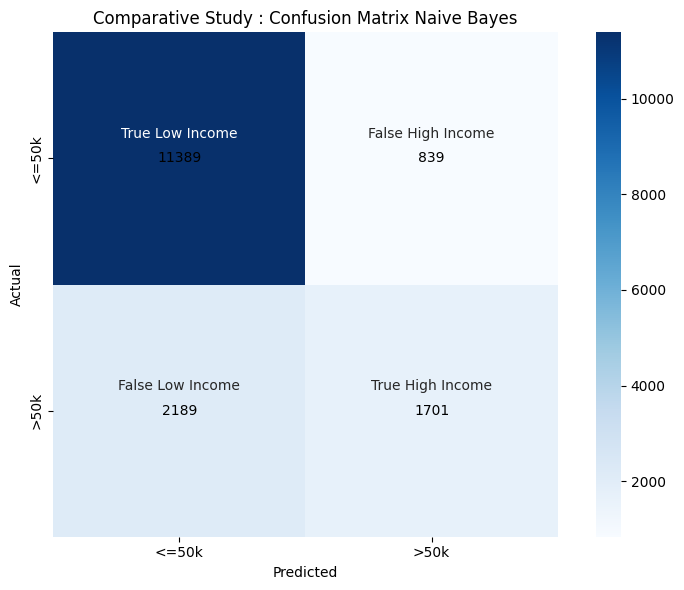

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, cmpstd_predictions)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Naive Bayes")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

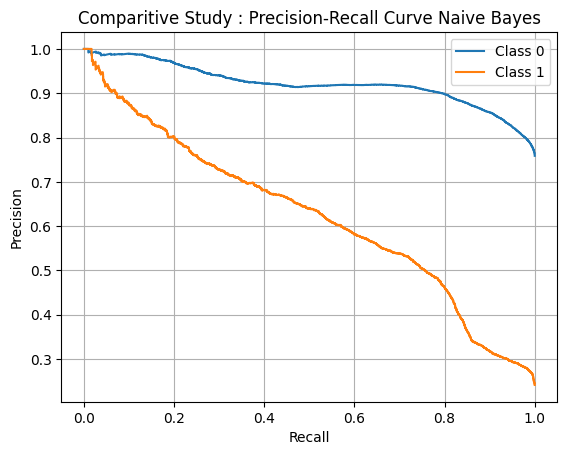

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (>= 50K)
nb_probas_pr_0 = nb_cmb_best_model.predict_proba(x_combined_test_new)[:, 0]
nb_probas_pr_1 = nb_cmb_best_model.predict_proba(x_combined_test_new)[:, 1]

# Compute precision and recall
precision_0, recal_0, _ = precision_recall_curve(y_combined_test_new, nb_probas_pr_0,pos_label=0)
precision_1, recal_1, _ = precision_recall_curve(y_combined_test_new, nb_probas_pr_1,pos_label=1)

# Plot precision-recall curve
plt.plot(recal_0, precision_0,label="Class 0")
plt.plot(recal_1, precision_1,label="Class 1")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Comparitive Study : Precision-Recall Curve Naive Bayes')
plt.grid(True)
plt.show()

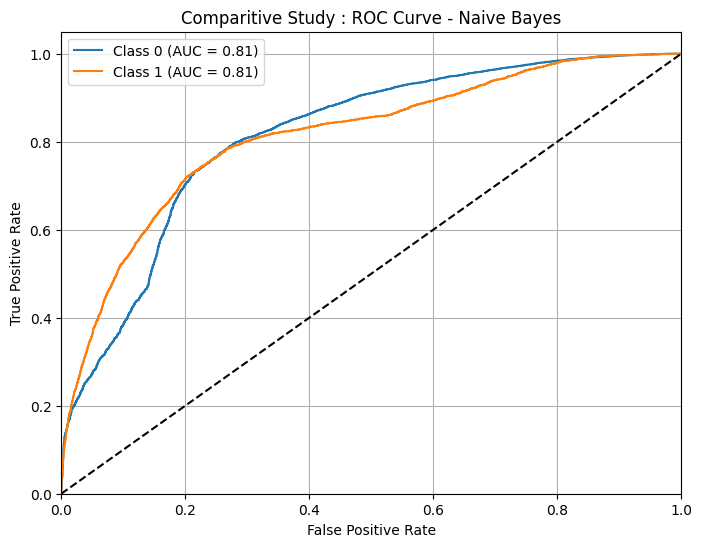

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = nb_cmb_best_model.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(nb_cmb_best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=nb_cmb_best_model.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(nb_cmb_best_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {nb_cmb_best_model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve - Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()

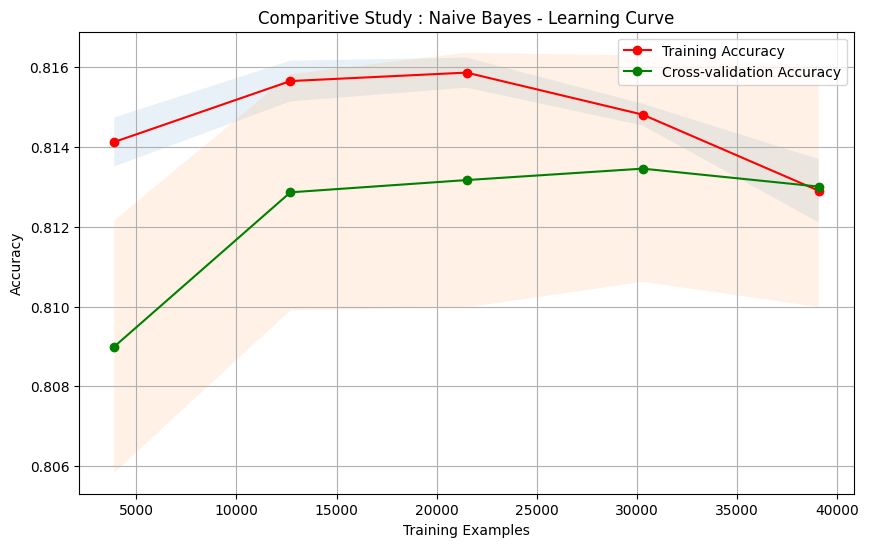

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(nb_cmb_best_model, x_combined_new, y_combined_new, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Comparitive Study : Naive Bayes - Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Accuracy')
plt.legend(loc='best')
plt.show()

### Logistic Regression Classifier

In [ ]:
#Logistic Regression with Hyperparamter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=10000)

# Define the hyperparameters to tune
param_grid = {'C': np.logspace(-1, 2, num=100),'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_combined_train_new, y_combined_train_new)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(x_combined_train_new, y_combined_train_new)

# Make predictions and evaluate performance
cmpstd_logreg_predictions = best_logreg.predict(x_combined_test_new)
print(classification_report(y_combined_test_new, cmpstd_logreg_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12259
           1       0.72      0.44      0.55      3859

    accuracy                           0.83     16118
   macro avg       0.78      0.70      0.72     16118
weighted avg       0.81      0.83      0.81     16118



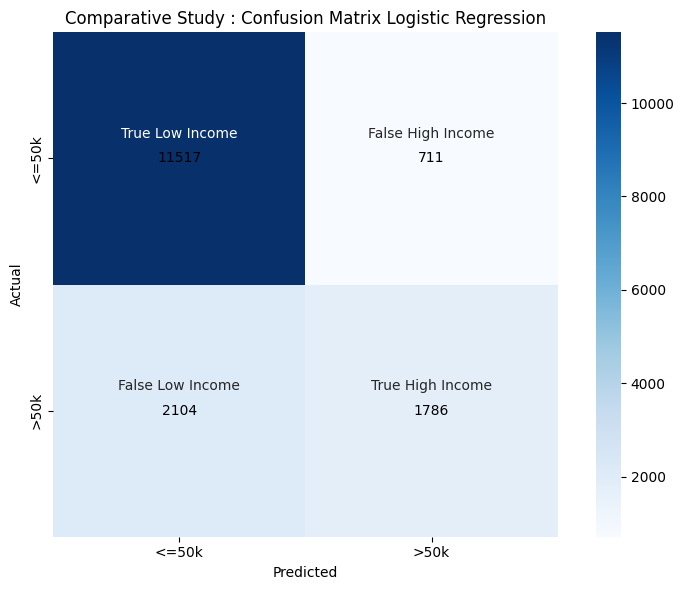

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, cmpstd_logreg_predictions)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Logistic Regression")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

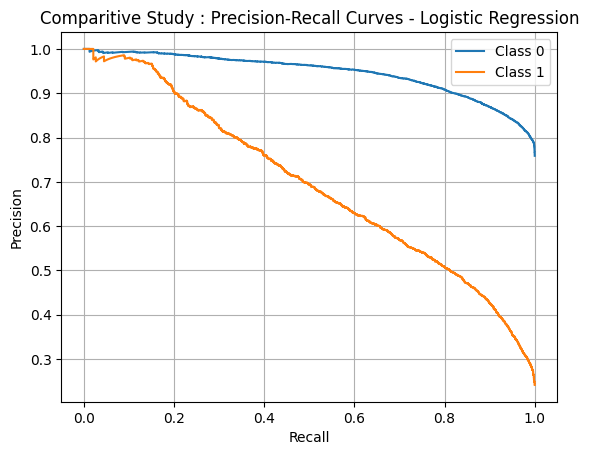

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = best_logreg.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

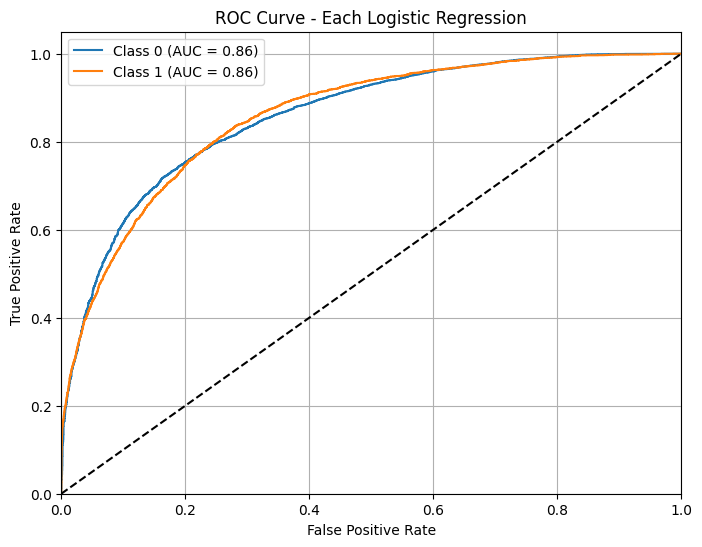

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = best_logreg.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(best_logreg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=best_logreg.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_logreg.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {best_logreg.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Each Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

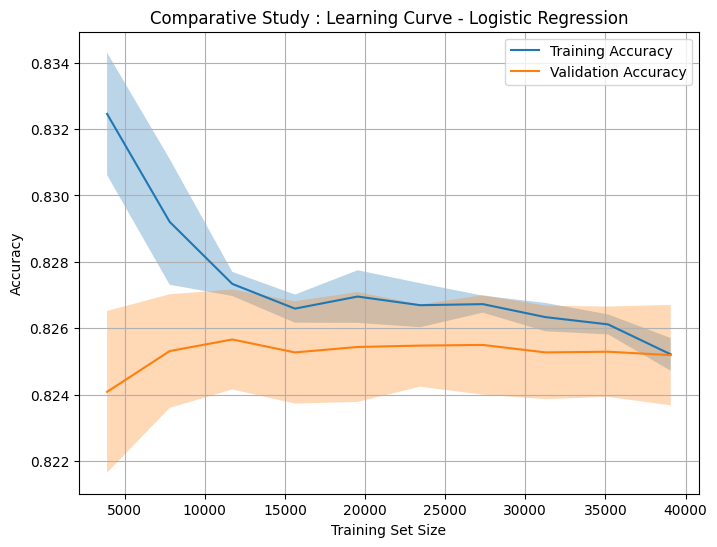

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_logreg, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Comparative Study : Learning Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

### Neural Network Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create a Neural Network classifier with 1 hidden layer
cmpstd_neural_classifier_1 = MLPClassifier(hidden_layer_sizes=(11), random_state=42,activation='logistic',max_iter=10000)

# Train the classifier
cmpstd_neural_classifier_1.fit(x_combined_train_new, y_combined_train_new)

# Make predictions on the test set
cmpstd_neural_predictions_1 = cmpstd_neural_classifier_1.predict(x_combined_test_new)

# Evaluate performance
print(classification_report(y_combined_test_new, cmpstd_neural_predictions_1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12259
           1       0.74      0.55      0.63      3859

    accuracy                           0.84     16118
   macro avg       0.80      0.74      0.77     16118
weighted avg       0.84      0.84      0.84     16118



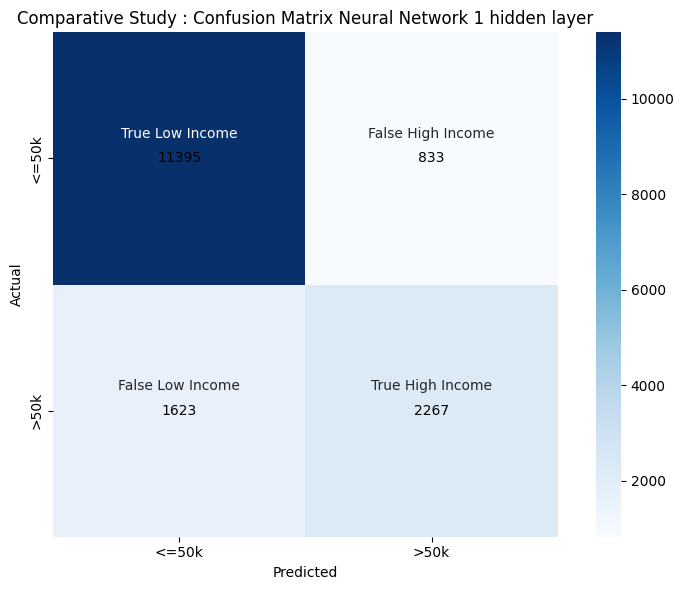

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, cmpstd_neural_predictions_1)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Neural Network 1 hidden layer")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

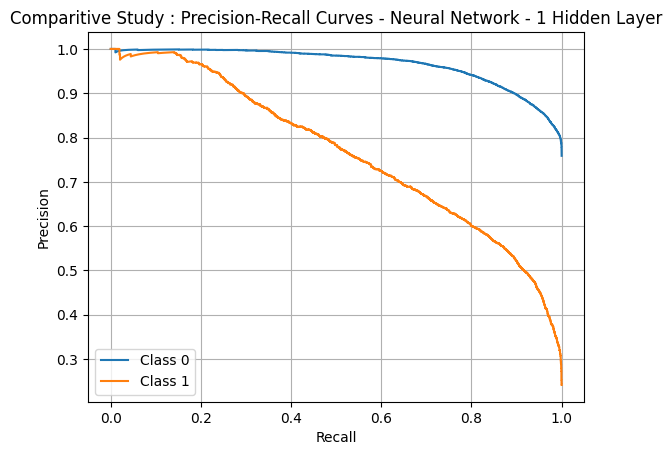

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = cmpstd_neural_classifier_1.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Neural Network - 1 Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

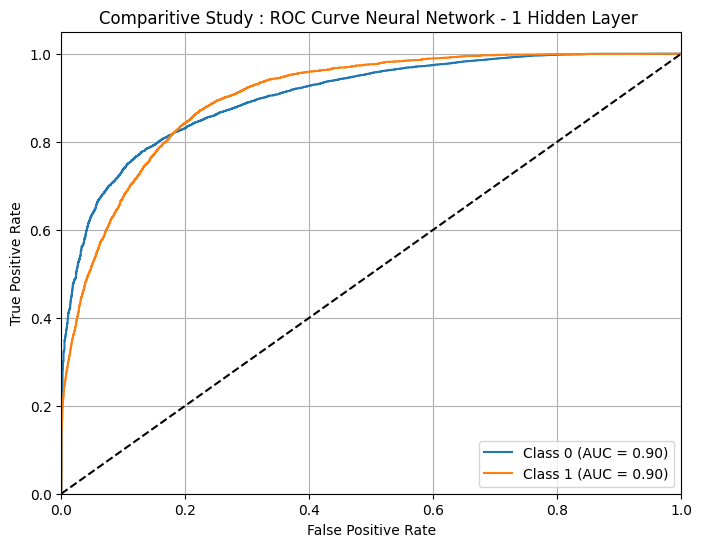

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = cmpstd_neural_classifier_1.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cmpstd_neural_classifier_1.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=cmpstd_neural_classifier_1.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(cmpstd_neural_classifier_1.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {cmpstd_neural_classifier_1.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve Neural Network - 1 Hidden Layer ')
plt.legend()
plt.grid(True)
plt.show()

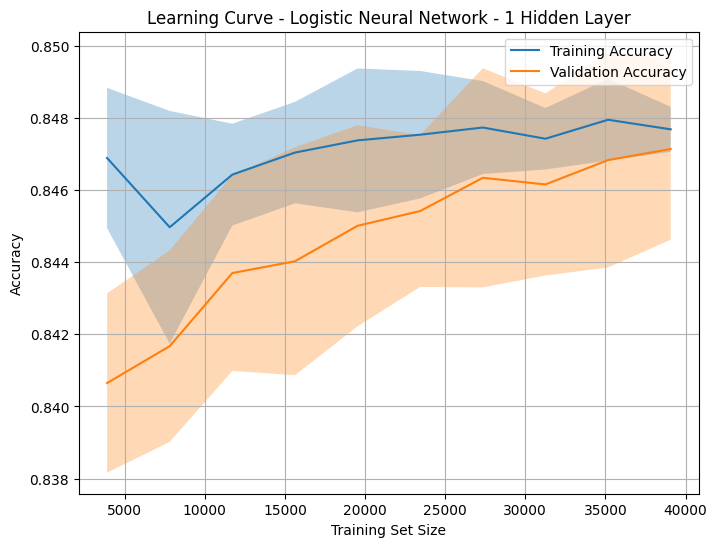

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    cmpstd_neural_classifier_1, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 1 Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create a Neural Network classifier with 2 hidden layers
cmpstd_neural_classifier_2 = MLPClassifier(hidden_layer_sizes=(11,9), random_state=42,activation='logistic',max_iter=10000)

# Train the classifier
cmpstd_neural_classifier_2.fit(x_combined_train_new, y_combined_train_new)

# Make predictions on the test set
cmpstd_neural_predictions_2 = cmpstd_neural_classifier_2.predict(x_combined_test_new)

# Evaluate performance
print(classification_report(y_combined_test_new, cmpstd_neural_predictions_2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12259
           1       0.74      0.55      0.63      3859

    accuracy                           0.85     16118
   macro avg       0.80      0.74      0.77     16118
weighted avg       0.84      0.85      0.84     16118



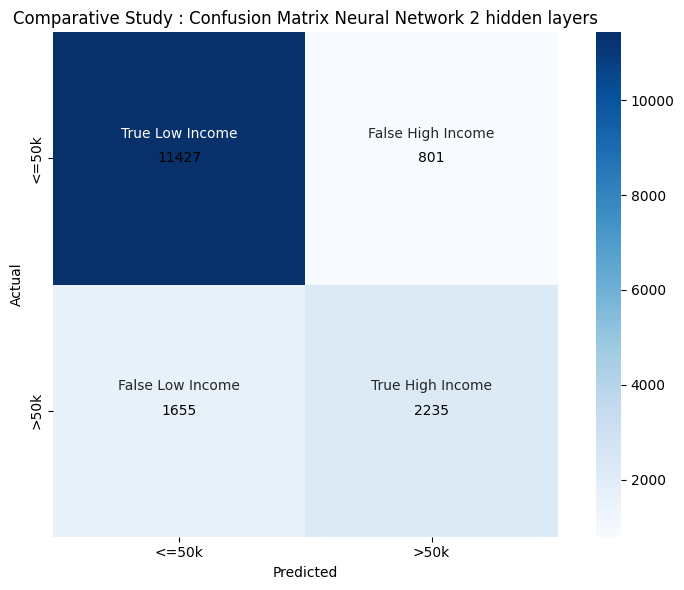

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, cmpstd_neural_predictions_2)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Neural Network 2 hidden layers")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

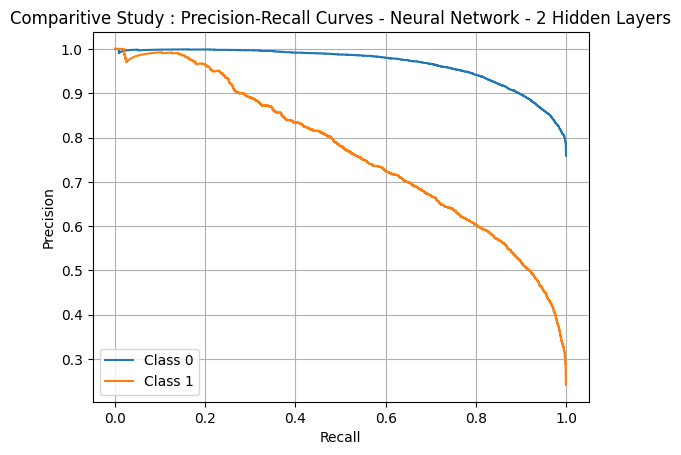

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = cmpstd_neural_classifier_2.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Neural Network - 2 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

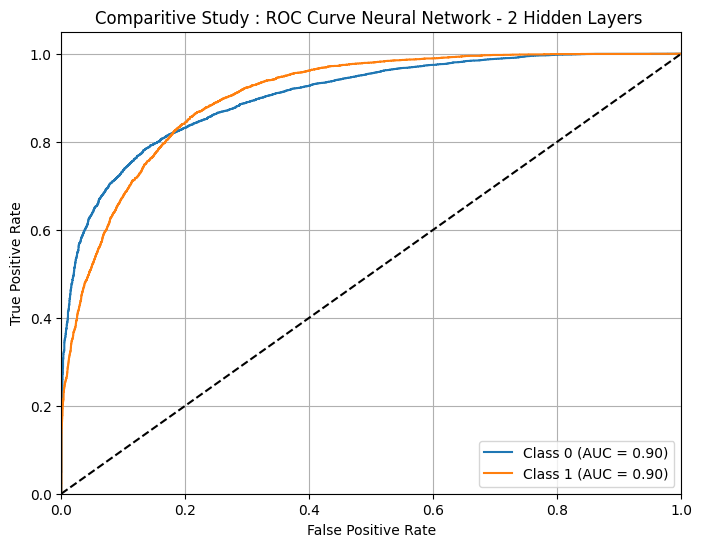

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = cmpstd_neural_classifier_2.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cmpstd_neural_classifier_2.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=cmpstd_neural_classifier_2.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(cmpstd_neural_classifier_2.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {cmpstd_neural_classifier_2.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve Neural Network - 2 Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()

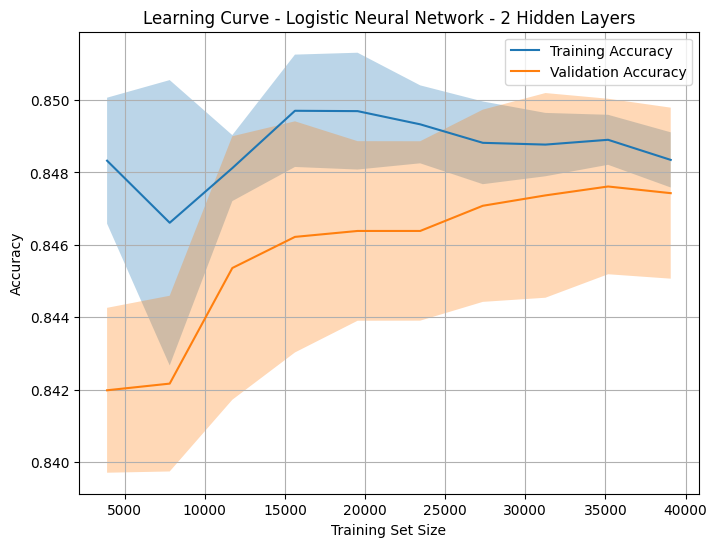

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    cmpstd_neural_classifier_2, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 2 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create a Neural Network classifier with 3 hidden layers
cmpstd_neural_classifier_3 = MLPClassifier(hidden_layer_sizes=(11,9,7), random_state=42,activation='logistic',max_iter=10000)

# Train the classifier
cmpstd_neural_classifier_3.fit(x_combined_train_new, y_combined_train_new)

# Make predictions on the test set
cmpstd_neural_predictions_3 = cmpstd_neural_classifier_3.predict(x_combined_test_new)

# Evaluate performance
print(classification_report(y_combined_test_new, cmpstd_neural_predictions_3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12259
           1       0.73      0.58      0.65      3859

    accuracy                           0.85     16118
   macro avg       0.80      0.76      0.77     16118
weighted avg       0.84      0.85      0.84     16118



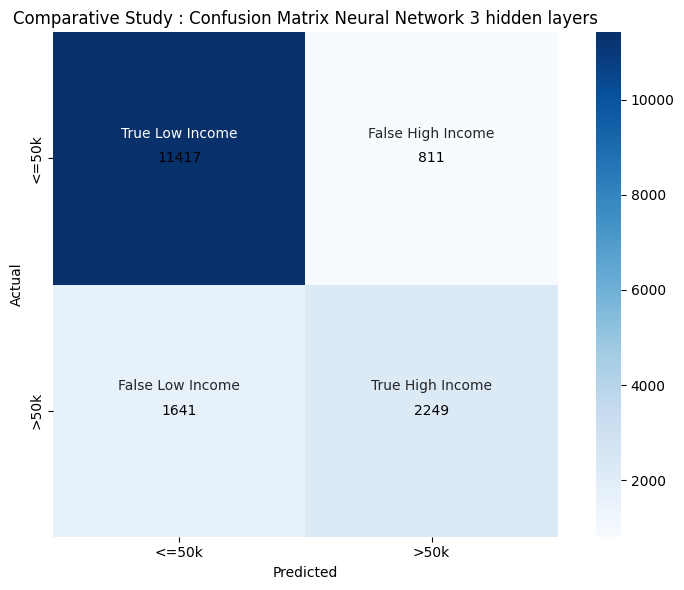

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, cmpstd_neural_predictions_3)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Neural Network 3 hidden layers")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

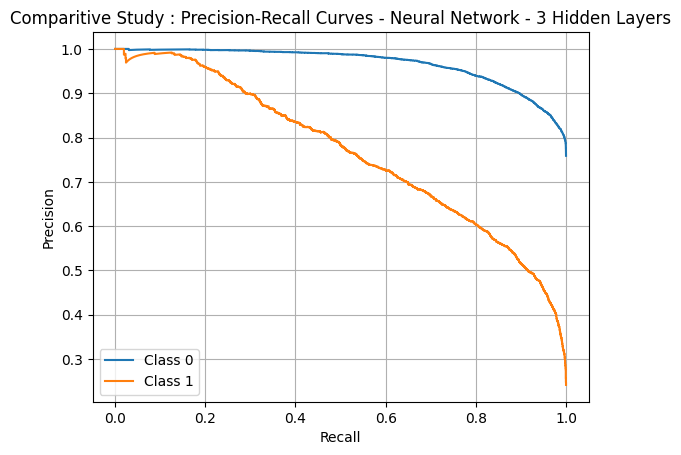

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = cmpstd_neural_classifier_3.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Neural Network - 3 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

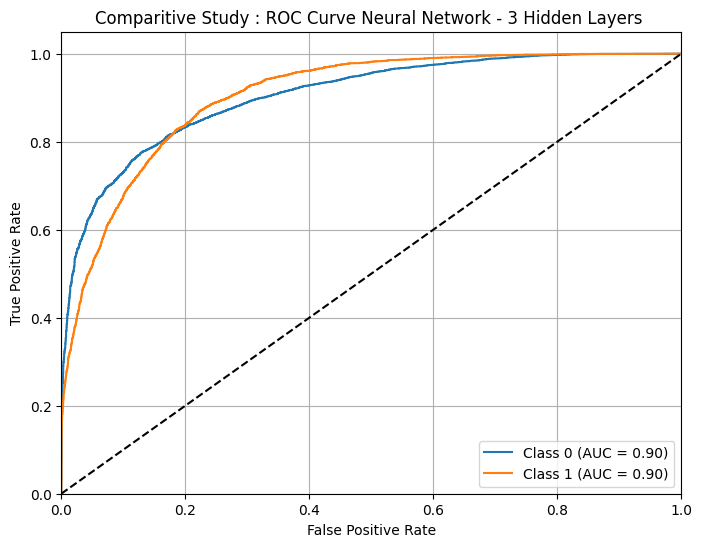

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = cmpstd_neural_classifier_3.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cmpstd_neural_classifier_3.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=cmpstd_neural_classifier_3.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(cmpstd_neural_classifier_3.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {cmpstd_neural_classifier_3.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve Neural Network - 3 Hidden Layers ')
plt.legend()
plt.grid(True)
plt.show()

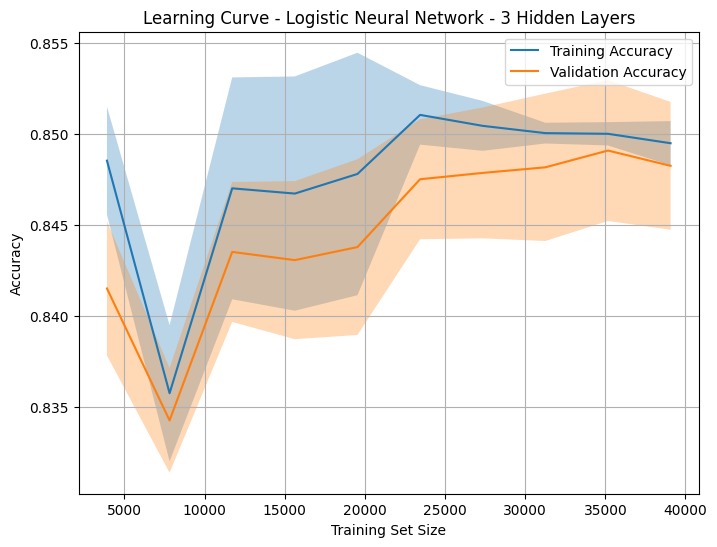

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    cmpstd_neural_classifier_3, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Neural Network - 3 Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pydot

# Convert MLPClassifier to dot graph format
dot_data = "graph NeuralNetwork {\n"
dot_data += "  rankdir=LR;\n"  # Set the graph direction from left to right
dot_data += "  nodesep=0.5;\n"  # Increase the space between nodes
dot_data += "  ranksep=1.5;\n"  # Increase the space between layers

# Add input layer neurons in a vertical line
input_neurons = x_combined_train_new.shape[1]
dot_data += "  { rank = same; Input1"
for i in range(2, input_neurons + 1):
    dot_data += f" -> Input{i}"
dot_data += " }\n"

# Add hidden layer neurons in a vertical line
hidden_neurons = cmpstd_neural_classifier_1.hidden_layer_sizes
dot_data += "  { rank = same; Hidden1_1"
for i in range(2, hidden_neurons + 1):
    dot_data += f" -> Hidden1_{i}"
dot_data += " }\n"

# Add output layer neurons in a vertical line
output_neurons = 1
dot_data += "  { rank = same; Output1"
for i in range(2, output_neurons + 1):
    dot_data += f" -> Output{i}"
dot_data += " }\n"

# Add connections between layers
for i in range(1, input_neurons + 1):
    for j in range(1, hidden_neurons + 1):
        dot_data += f"  Input{i} -- Hidden1_{j} [penwidth=2];\n"

for i in range(hidden_neurons):
    dot_data += f"  Hidden1_{i+1} -- Output1 [penwidth=2];\n"

dot_data += "}\n"

# Create the graph
graph = pydot.graph_from_dot_data(dot_data)[0]

# Set the graph size
graph.set("size", '"30,12"')

# Save the graph as an image
graph.write_png("neural_network_graph_1.png", prog="dot")

In [ ]:
import pydot

# Convert MLPClassifier to dot graph format
dot_data = "graph NeuralNetwork {\n"
dot_data += "  rankdir=LR;\n"  # Set the graph direction from left to right
dot_data += "  nodesep=0.5;\n"  # Increase the space between nodes
dot_data += "  ranksep=1.5;\n"  # Increase the space between layers

# Add input layer neurons in a vertical line
input_neurons = x_combined_train_new.shape[1]
dot_data += "  { rank = same; Input1"
for i in range(2, input_neurons + 1):
    dot_data += f" -> Input{i}"
dot_data += " }\n"

# Add hidden layers with neurons in vertical lines
hidden_layers = len(cmpstd_neural_classifier_2.hidden_layer_sizes)
neurons_count = cmpstd_neural_classifier_2.hidden_layer_sizes
for i, neurons in enumerate(neurons_count):
    dot_data += f"  {{ rank = same; HiddenLayer{i+1}_1"
    for j in range(2, neurons + 1):
        dot_data += f" -> HiddenLayer{i+1}_{j}"
    dot_data += f" }}\n"

# Add output layer neurons in a vertical line
output_neurons = 1
dot_data += "  { rank = same; Output1"
for i in range(2, output_neurons + 1):
    dot_data += f" -> Output{i}"
dot_data += " }\n"

# Add connections between layers
for i in range(1, input_neurons + 1):
    for j in range(1, neurons_count[0] + 1):
        dot_data += f"  Input{i} -- HiddenLayer1_{j} [penwidth=2];\n"

for i in range(hidden_layers-1):
    for j in range(neurons_count[i]):
        for k in range(neurons_count[i+1]):
            dot_data += f"  HiddenLayer{i+1}_{j+1} -- HiddenLayer{i+2}_{k+1} [penwidth=2];\n"

for i in range(neurons_count[hidden_layers-1]):
    dot_data += f"  HiddenLayer{hidden_layers}_{i+1} -- Output1 [penwidth=2];\n"

dot_data += "}\n"

# Create the graph
graph = pydot.graph_from_dot_data(dot_data)[0]

# Set the graph size
graph.set("size", '"30,12"')

# Save the graph as an image
graph.write_png("neural_network_graph_2.png", prog="dot")

In [ ]:
import pydot

# Convert MLPClassifier to dot graph format
dot_data = "graph NeuralNetwork {\n"
dot_data += "  rankdir=LR;\n"  # Set the graph direction from left to right
dot_data += "  nodesep=0.5;\n"  # Increase the space between nodes
dot_data += "  ranksep=1.5;\n"  # Increase the space between layers

# Add input layer neurons in a vertical line
input_neurons = x_combined_train_new.shape[1]
dot_data += "  { rank = same; Input1"
for i in range(2, input_neurons + 1):
    dot_data += f" -> Input{i}"
dot_data += " }\n"

# Add hidden layers with neurons in vertical lines
hidden_layers = len(cmpstd_neural_classifier_3.hidden_layer_sizes)
neurons_count = cmpstd_neural_classifier_3.hidden_layer_sizes
for i, neurons in enumerate(neurons_count):
    dot_data += f"  {{ rank = same; HiddenLayer{i+1}_1"
    for j in range(2, neurons + 1):
        dot_data += f" -> HiddenLayer{i+1}_{j}"
    dot_data += f" }}\n"

# Add output layer neurons in a vertical line
output_neurons = 1
dot_data += "  { rank = same; Output1"
for i in range(2, output_neurons + 1):
    dot_data += f" -> Output{i}"
dot_data += " }\n"

# Add connections between layers
for i in range(1, input_neurons + 1):
    for j in range(1, neurons_count[0] + 1):
        dot_data += f"  Input{i} -- HiddenLayer1_{j} [penwidth=2];\n"

for i in range(hidden_layers-1):
    for j in range(neurons_count[i]):
        for k in range(neurons_count[i+1]):
            dot_data += f"  HiddenLayer{i+1}_{j+1} -- HiddenLayer{i+2}_{k+1} [penwidth=2];\n"

for i in range(neurons_count[hidden_layers-1]):
    dot_data += f"  HiddenLayer{hidden_layers}_{i+1} -- Output1 [penwidth=2];\n"

dot_data += "}\n"

# Create the graph
graph = pydot.graph_from_dot_data(dot_data)[0]

# Set the graph size
graph.set("size", '"30,12"')

# Save the graph as an image
graph.write_png("neural_network_graph_3.png", prog="dot")

In [ ]:
#Importing the required libraries
from sklearn.ensemble import RandomForestClassifier

#Building the Classifier
random_forest = RandomForestClassifier(random_state = 50)
#Training
random_forest.fit(x_combined_train_new, y_combined_train_new)

#Predictions
y_randomforest_predictions = random_forest.predict(x_combined_test_new)

In [ ]:
from sklearn.metrics import f1_score
#Evaluation Metrics of the model Accuracy and fscore

# Evaluate performance
print(classification_report(y_combined_test_new, y_randomforest_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12259
           1       0.75      0.63      0.68      3859

    accuracy                           0.86     16118
   macro avg       0.82      0.78      0.80     16118
weighted avg       0.85      0.86      0.86     16118



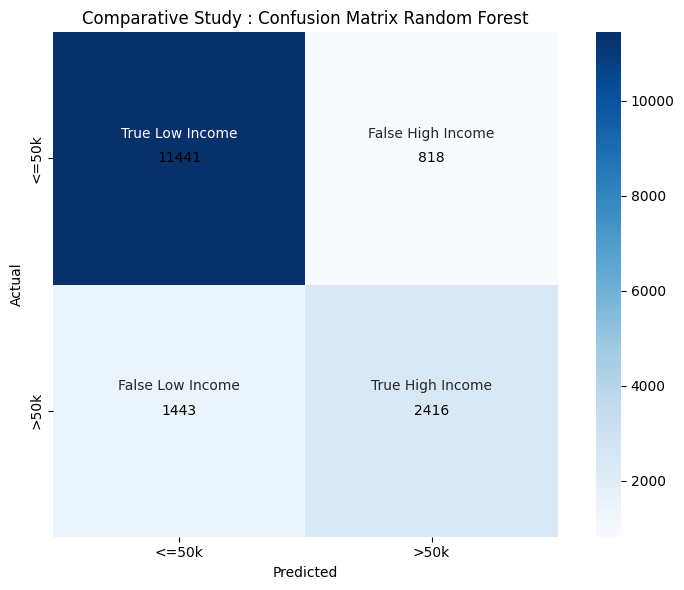

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, y_randomforest_predictions)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Random Forest")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

    Class 0                                  Class 1
Precision Recall Fscore Support  Precision Recall Fscore Support

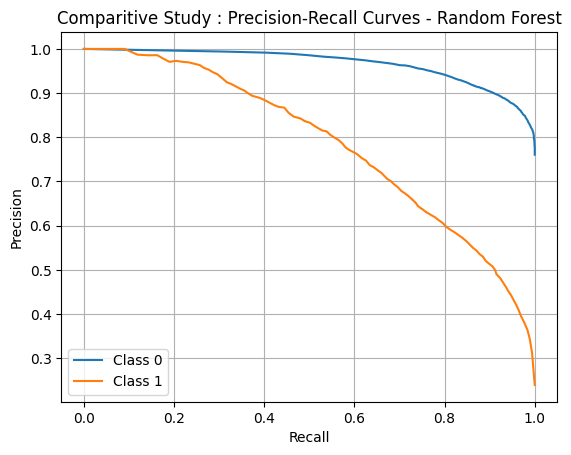

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas =random_forest.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

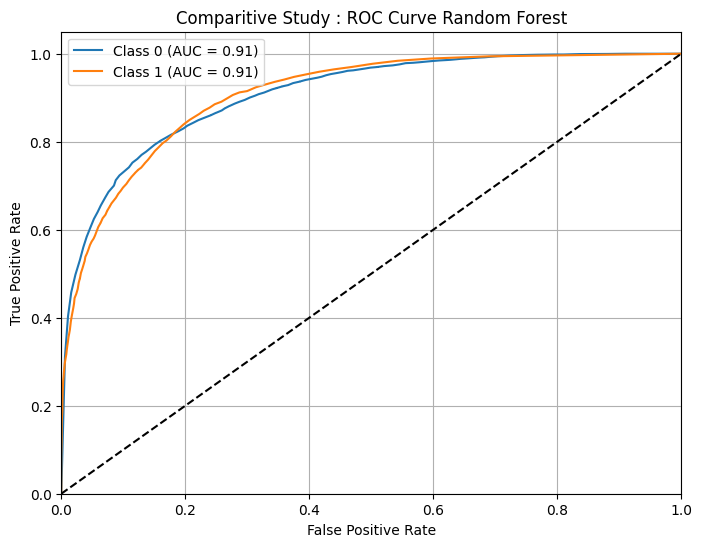

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = random_forest.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=random_forest.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(random_forest.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {random_forest.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve Random Forest')
plt.legend()
plt.grid(True)
plt.show()

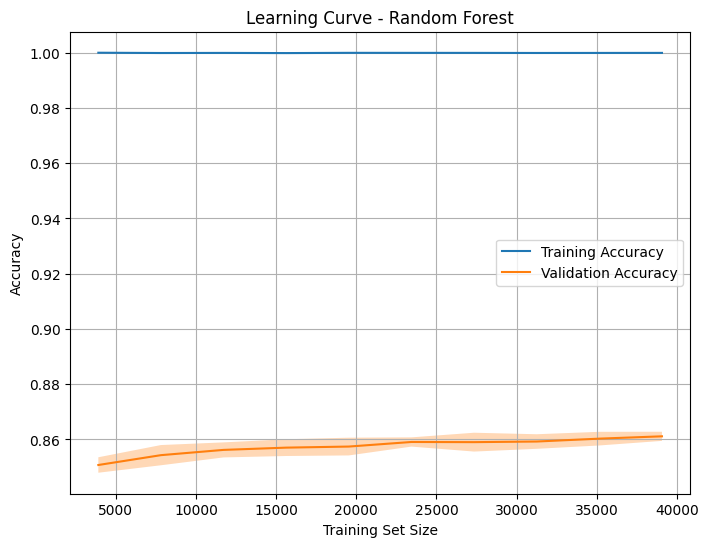

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Importing the CLassifier
from sklearn.tree import DecisionTreeClassifier
new_default = DecisionTreeClassifier()
#.fit method to train the model
new_default.fit(x_combined_train_new, y_combined_train_new)

DecisionTreeClassifier()

In [ ]:
#  check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
comb_y_predict_default = new_default.predict(x_combined_test_new)

# Printing classifier report after prediction
print(classification_report(y_combined_test_new,comb_y_predict_default))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12259
           1       0.60      0.62      0.61      3859

    accuracy                           0.81     16118
   macro avg       0.74      0.75      0.74     16118
weighted avg       0.81      0.81      0.81     16118



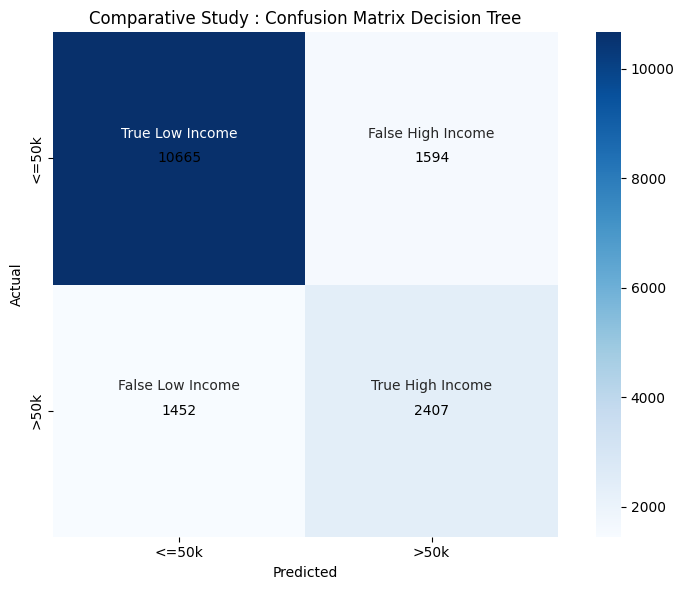

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

# Create a confusion matrix
cm = confusion_matrix(y_combined_test_new, comb_y_predict_default)

# Define class labels
class_names = ['<=50k', '>50k']
labels = ['True Low Income\n\n\n','False High Income\n\n\n','False Low Income\n\n\n','True High Income\n\n\n']
labels = np.asarray(labels).reshape(2,2)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',  square=True,
            xticklabels=class_names, yticklabels=class_names)

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Comparative Study : Confusion Matrix Decision Tree")
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

# Display data points in each square
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

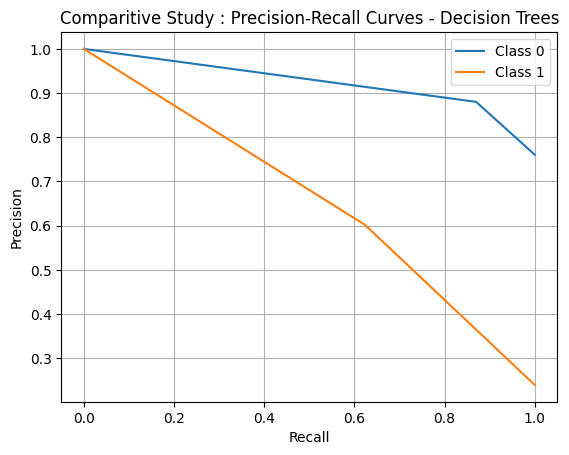

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas =new_default.predict_proba(x_combined_test_new)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Decision Trees')
plt.legend()
plt.grid(True)
plt.show()

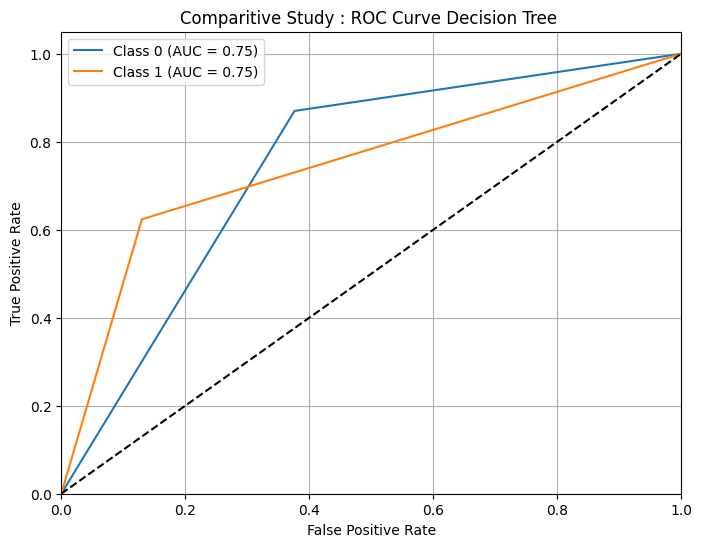

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = new_default.predict_proba(x_combined_test_new)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(new_default.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_combined_test_new, probas[:, i], pos_label=new_default.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(new_default.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {new_default.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparitive Study : ROC Curve Decision Tree ')
plt.legend()
plt.grid(True)
plt.show()

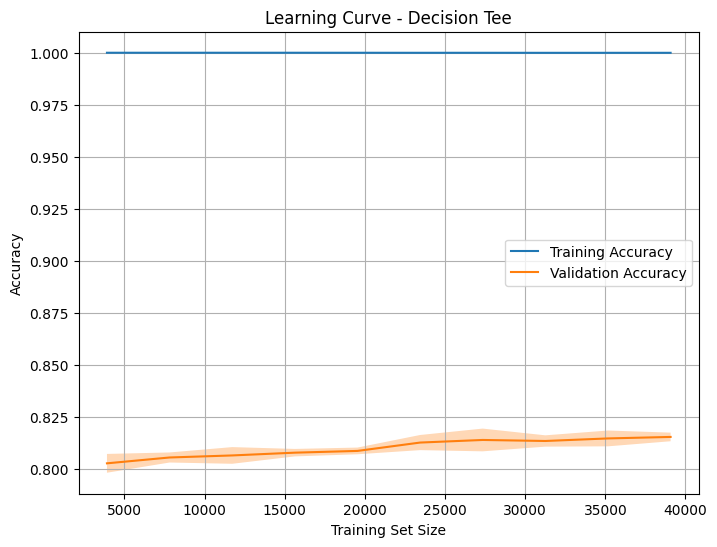

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    new_default, x_combined_new, y_combined_new, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Decision Tee')
plt.legend()
plt.grid(True)
plt.show()

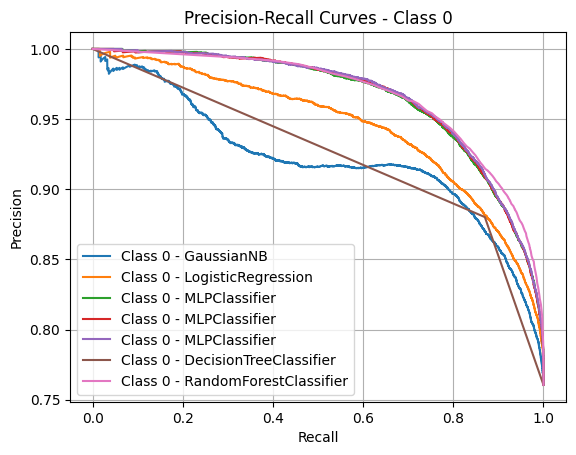

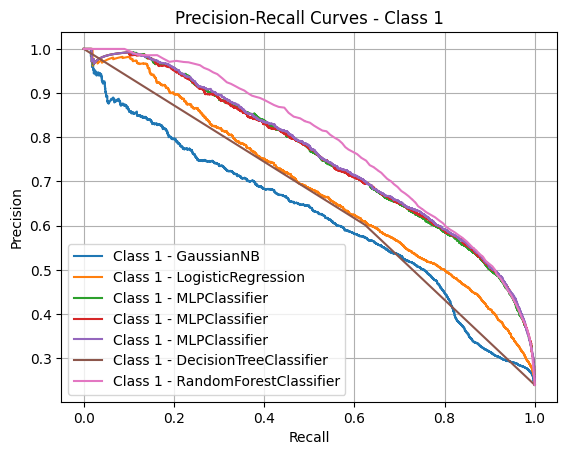

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifiers = [nb_cmb_best_model, best_logreg, cmpstd_neural_classifier_1,cmpstd_neural_classifier_2, cmpstd_neural_classifier_3,new_default,random_forest]

# Iterate over the classifiers
for clf in classifiers:
    # Get the probabilities for each class
    probas = clf.predict_proba(x_combined_test_new)

    # Compute precision and recall for class 0 (<= 50K)
    precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

    # Compute precision and recall for class 1 (>= 50K)
    precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

    # Plot precision-recall curves for class 0
    plt.plot(recall_0, precision_0, label=f'Class 0 - {clf.__class__.__name__}')

# Add labels and title for the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Class 0')
plt.legend()
plt.grid(True)
plt.show()

# Iterate over the classifiers again
for clf in classifiers:
    # Get the probabilities for each class
    probas = clf.predict_proba(x_combined_test_new)

    # Compute precision and recall for class 0 (<= 50K)
    precision_0, recall_0, _ = precision_recall_curve(y_combined_test_new, probas[:, 0], pos_label=0)

    # Compute precision and recall for class 1 (>= 50K)
    precision_1, recall_1, _ = precision_recall_curve(y_combined_test_new, probas[:, 1], pos_label=1)

    # Plot precision-recall curves for class 1
    plt.plot(recall_1, precision_1, label=f'Class 1 - {clf.__class__.__name__}')

# Add labels and title for the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Class 1')
plt.legend()
plt.grid(True)
plt.show()


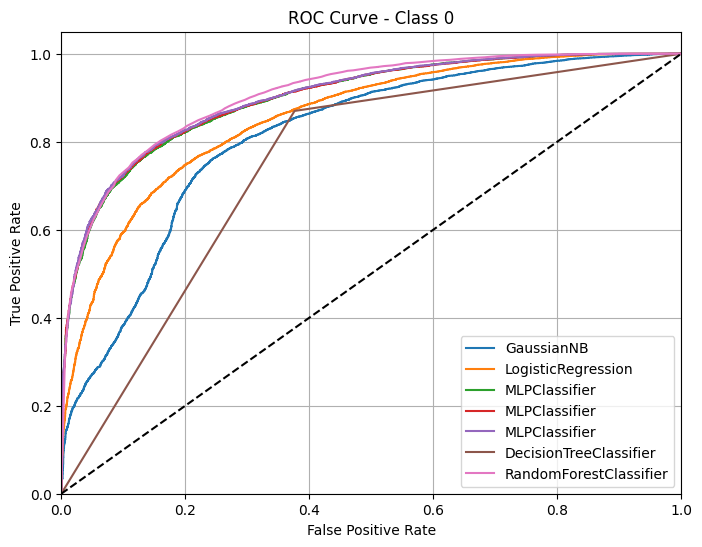

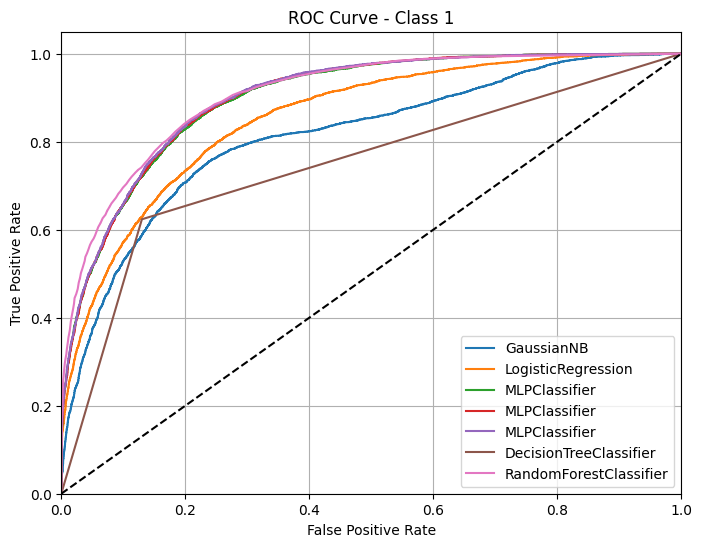

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifiers = [nb_cmb_best_model, best_logreg, cmpstd_neural_classifier_1,cmpstd_neural_classifier_2, cmpstd_neural_classifier_3,new_default,random_forest]
# Initialize empty lists to store fpr and tpr values for each classifier
fpr_class0_list = []
tpr_class0_list = []
fpr_class1_list = []
tpr_class1_list = []

# Iterate over the classifiers
for clf in classifiers:
    # Get the predicted probabilities for each class
    probas = clf.predict_proba(x_combined_test_new)

    # Compute the ROC curve for class 0
    fpr_class0, tpr_class0, _ = roc_curve(y_combined_test_new, probas[:, 0], pos_label=0)
    fpr_class0_list.append(fpr_class0)
    tpr_class0_list.append(tpr_class0)

    # Compute the ROC curve for class 1
    fpr_class1, tpr_class1, _ = roc_curve(y_combined_test_new, probas[:, 1], pos_label=1)
    fpr_class1_list.append(fpr_class1)
    tpr_class1_list.append(tpr_class1)

# Plot the ROC curve for class 0
plt.figure(figsize=(8, 6))
for i in range(len(classifiers)):
    plt.plot(fpr_class0_list[i], tpr_class0_list[i], label=f'{classifiers[i].__class__.__name__}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class 0')
plt.legend()
plt.grid(True)
plt.show()

# Plot the ROC curve for class 1
plt.figure(figsize=(8, 6))
for i in range(len(classifiers)):
    plt.plot(fpr_class1_list[i], tpr_class1_list[i], label=f'{classifiers[i].__class__.__name__}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class 1')
plt.legend()
plt.grid(True)
plt.show()


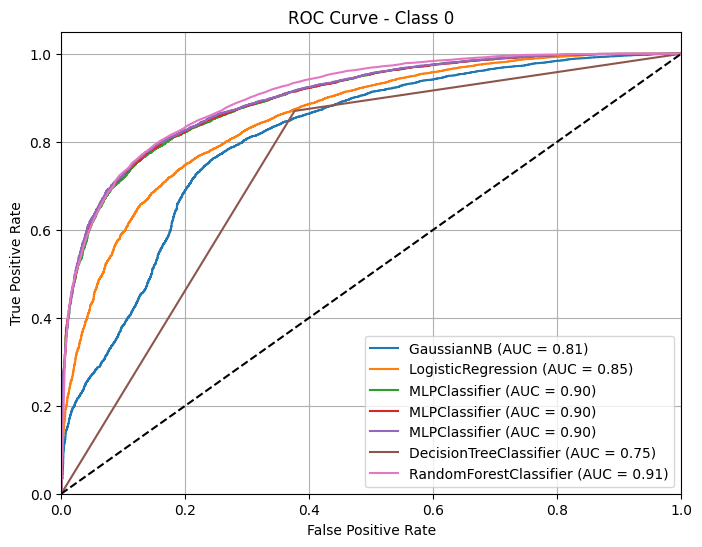

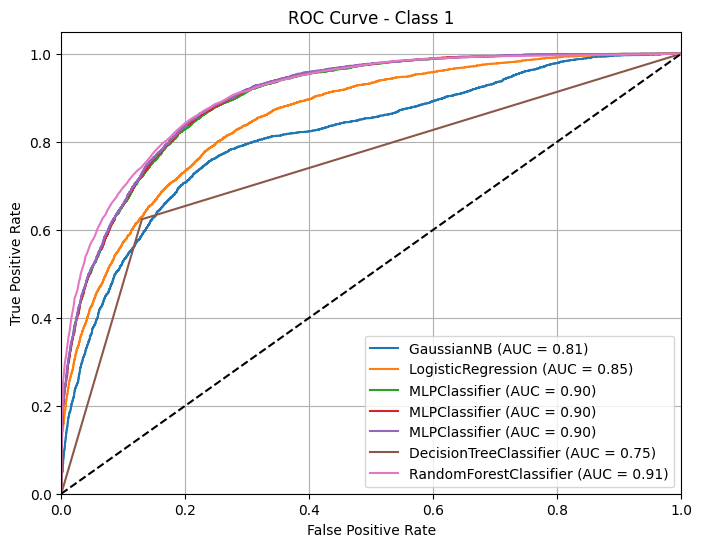

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifiers = [nb_cmb_best_model, best_logreg, cmpstd_neural_classifier_1,cmpstd_neural_classifier_2, cmpstd_neural_classifier_3,new_default,random_forest]
# Initialize empty lists to store fpr, tpr, and auc values for each classifier
fpr_class0_list = []
tpr_class0_list = []
auc_class0_list = []
fpr_class1_list = []
tpr_class1_list = []
auc_class1_list = []

# Iterate over the classifiers
for clf in classifiers:
    # Get the predicted probabilities for each class
    probas = clf.predict_proba(x_combined_test_new)

    # Compute the ROC curve for class 0
    fpr_class0, tpr_class0, _ = roc_curve(y_combined_test_new, probas[:, 0], pos_label=0)
    fpr_class0_list.append(fpr_class0)
    tpr_class0_list.append(tpr_class0)
    auc_class0_list.append(auc(fpr_class0, tpr_class0))

    # Compute the ROC curve for class 1
    fpr_class1, tpr_class1, _ = roc_curve(y_combined_test_new, probas[:, 1], pos_label=1)
    fpr_class1_list.append(fpr_class1)
    tpr_class1_list.append(tpr_class1)
    auc_class1_list.append(auc(fpr_class1, tpr_class1))

# Plot the ROC curve for class 0
plt.figure(figsize=(8, 6))
for i in range(len(classifiers)):
    plt.plot(fpr_class0_list[i], tpr_class0_list[i], label=f'{classifiers[i].__class__.__name__} (AUC = {auc_class0_list[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class 0')
plt.legend()
plt.grid(True)
plt.show()

# Plot the ROC curve for class 1
plt.figure(figsize=(8, 6))
for i in range(len(classifiers)):
    plt.plot(fpr_class1_list[i], tpr_class1_list[i], label=f'{classifiers[i].__class__.__name__} (AUC = {auc_class1_list[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class 1')
plt.legend()
plt.grid(True)
plt.show()
